In [2]:
!pip install plotly

In [1]:
import love_triangle

import matplotlib.pyplot as plt

#improve resolution
%config InlineBackend.figure_format ='retina'

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 17)
plt.rcParams.update({'font.size': 16})


In [2]:
plotter = love_triangle.PhasePortrait()

In [3]:
plotter.widget

    'data': [{'mode': 'lines',
              'name': 'Mark & Bridget',
         …

In [4]:
import numpy as np
from love_triangle import *

def calculateOverTime(timePeriod, initial_mb, initial_bm, initial_bd, initial_db,
                      beta, appeal_bm, appeal_bd, appeal_m, appeal_d):
    
    def updateFeelings(mb, bm, db, bd):
        
        # Step size
        dt = 0.01
        
        # Change in Mark towards Bridget
        dmb_dt_val = dmb_dt(mb, bm, appeal_bm) * dt

        # Change in Bridget towards Mark & Daniel
        dbm_dt_val = dbm_dt(bm, mb, appeal_m, beta, bd) * dt
        dbd_dt_val = dbd_dt(bd, db, appeal_d, beta, bm) * dt

        # Change in Daniel towards Bridget
        ddb_dt_val = ddb_dt(db, bd, appeal_bd) * dt

        # Update Mark towards Bridget
        mb = mb + dmb_dt_val
        # Update Bridget towards Mark & Daniel
        bm = bm + dbm_dt_val
        bd = bd + dbd_dt_val
        # Update Daniel towards Bridget
        db = db + ddb_dt_val

        return (mb, bm, bd, db)

    # Initialize arrays
    mb_array = np.array([initial_mb])
    bm_array = np.array([initial_bm])
    bd_array = np.array([initial_bd])
    db_array = np.array([initial_db])
    
    # Initialize mb, bm, bd, db
    mb = initial_mb
    bm = initial_bm
    bd = initial_bd
    db = initial_db
    
    for t in range(timePeriod):
        mb, bm, bd, db = updateFeelings(mb, bm, db, bd)
        mb_array = np.append(mb_array, mb)
        bm_array = np.append(bm_array, bm)
        bd_array = np.append(bd_array, bd)
        db_array = np.append(db_array, db)
        
    return (mb_array, bm_array, bd_array, db_array)

In [5]:
# timePeriod, initial_mb, initial_bm, initial_bd, initial_db, beta, appeal_bm, appeal_bd, appeal_m, appeal_d

timePeriod = 365

trial1 = [timePeriod, 1, 1, 0, 0, 0.3, 1, 0.9, 0.9, 1]
trial2 = [timePeriod, 2, 2, 0, 2, 0.3, 1, 0.9, 0.9, 1]
trial3 = [timePeriod, 0, 0, 1, 1, 0.3, 1, 0.9, 0.9, 1]
trial4 = [timePeriod, -1, -1, 0, 0, 0.3, 1, 0.9, 0.9, 1]
trial5 = [timePeriod, -1, -1, 1, 1, 0.3, 1, 0.9, 0.9, 1]
trial6 = [timePeriod, 1, 1, -1, -1, 0.3, 1, 0.9, 0.9, 1]
trial7 = [timePeriod, 0, 0, -1, -1, 0.3, 1, 0.9, 0.9, 1]
trial8 = [timePeriod, 2, 0, 0, 2, 0.3, 1, 0.9, 0.9, 1]

trials = [trial1, trial2, trial3, trial4, trial5, trial6, trial7, trial8]

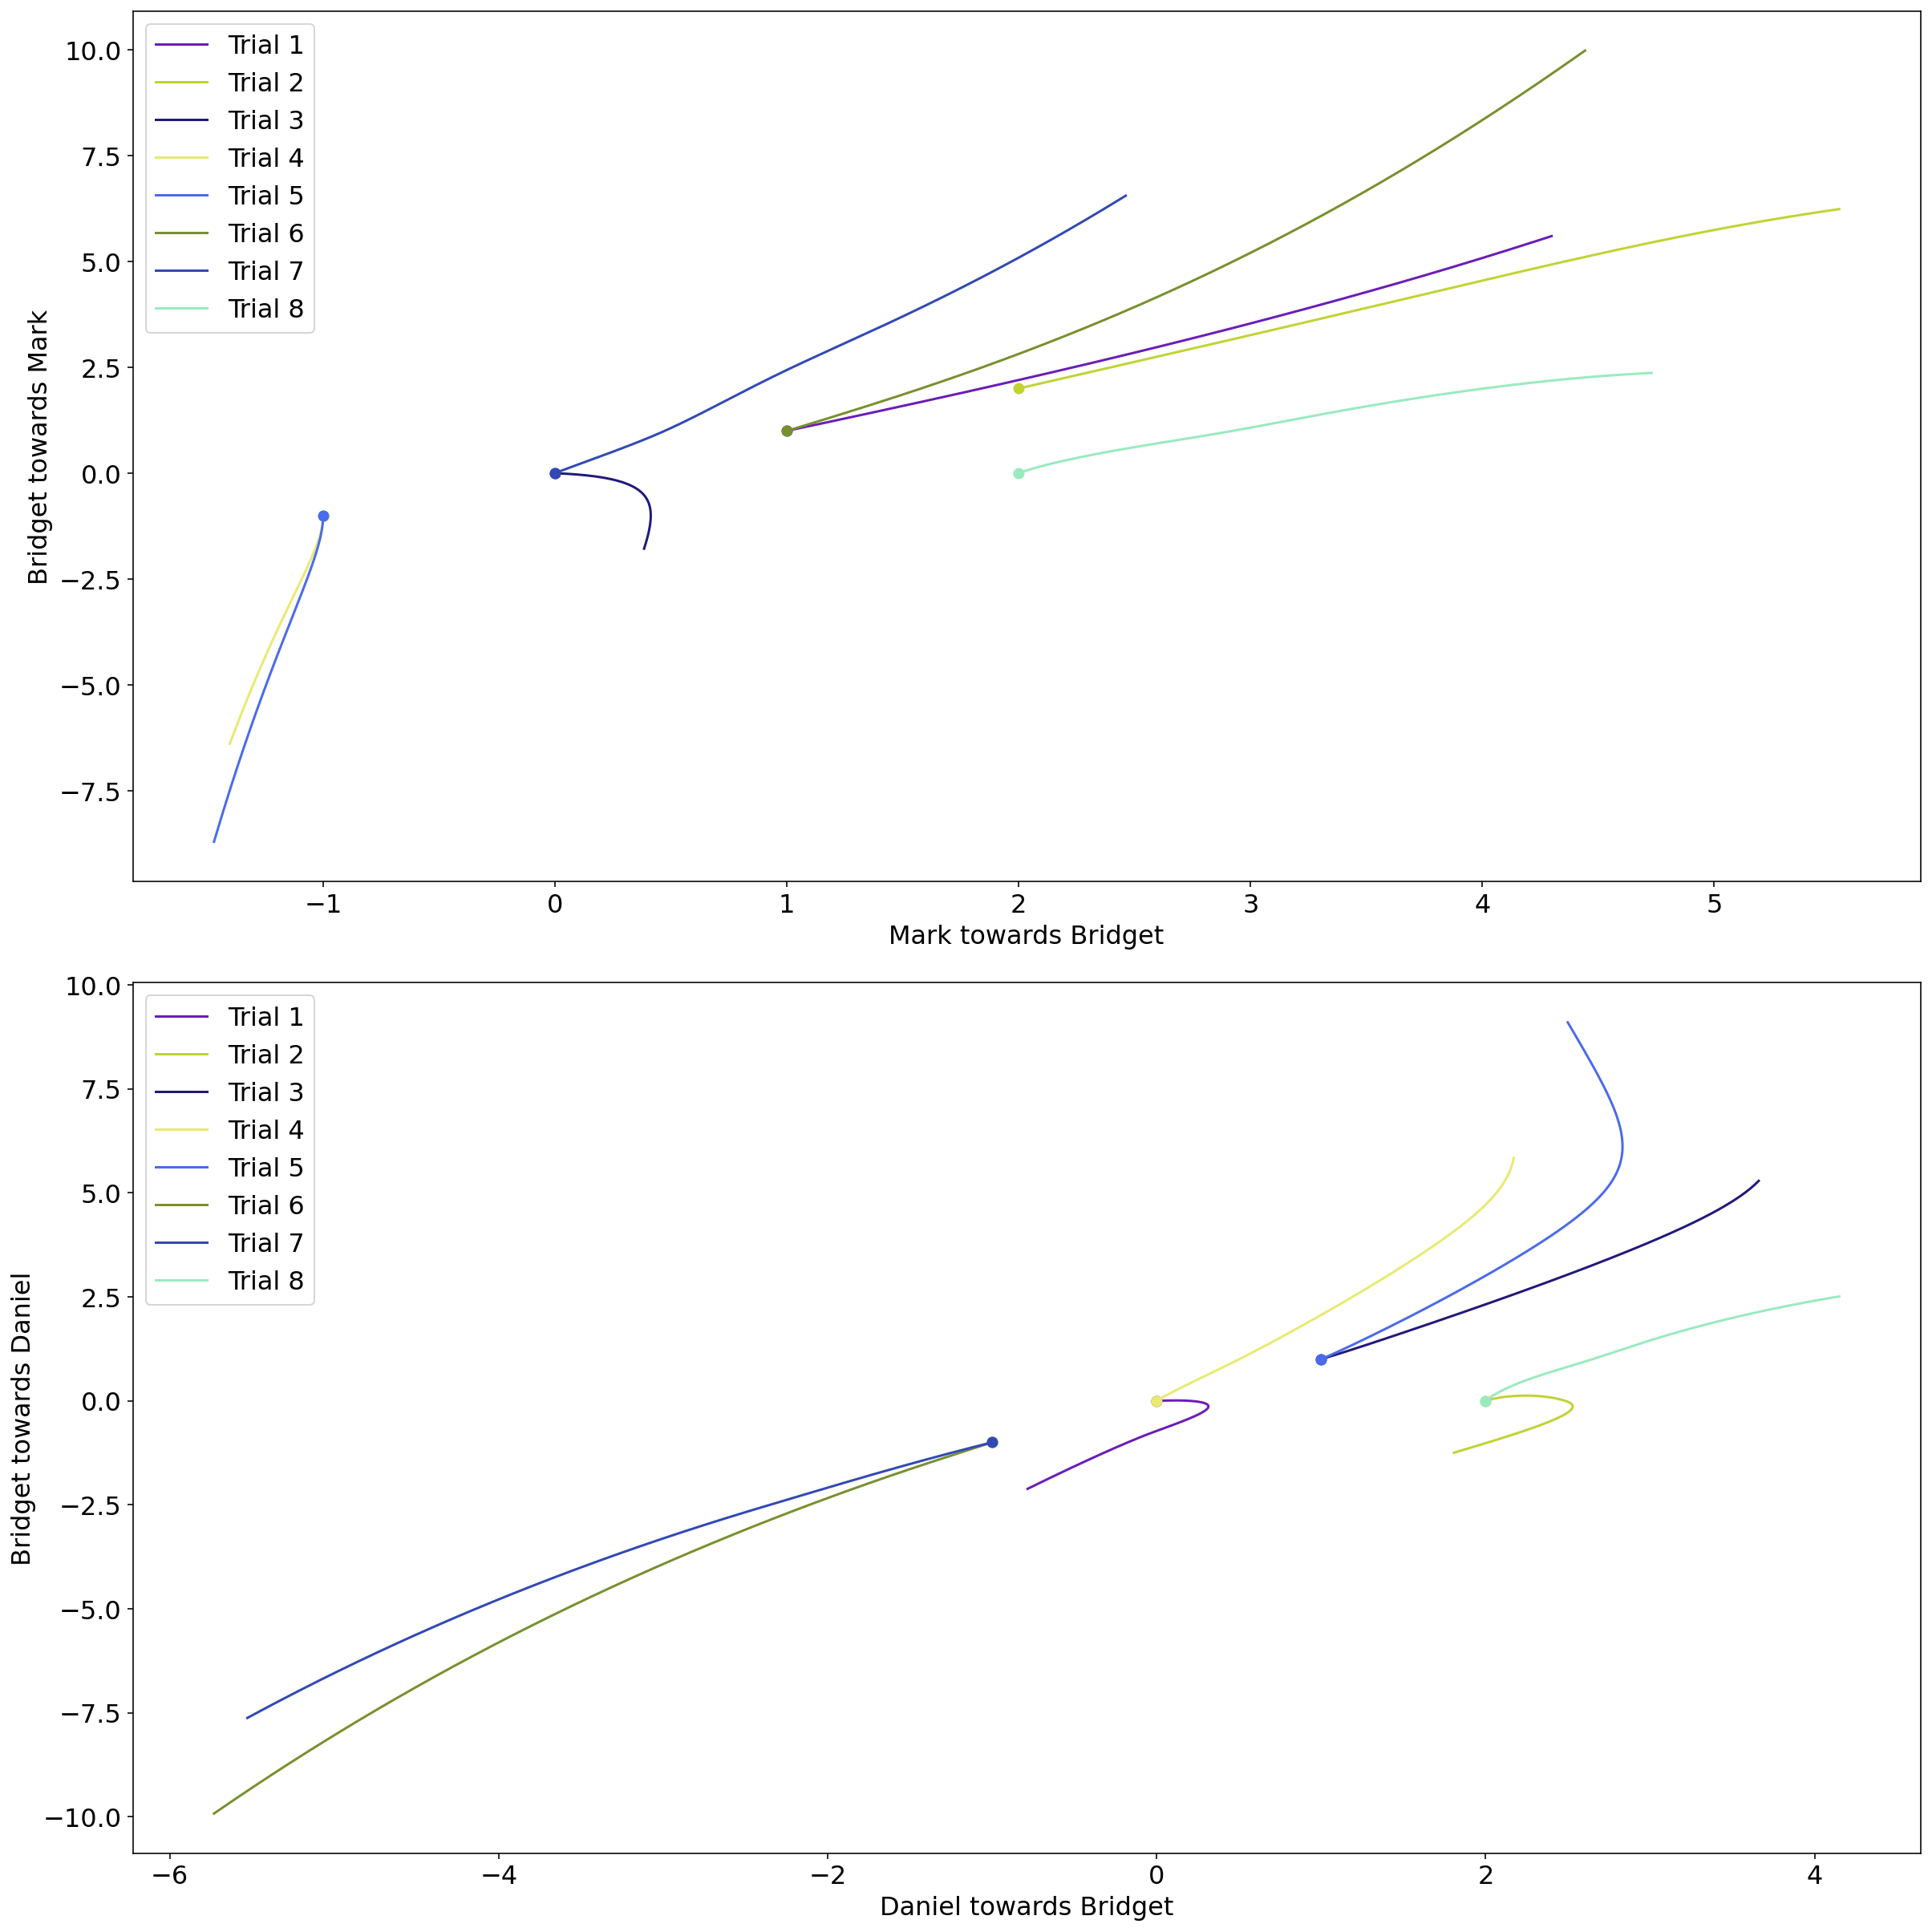

In [6]:
fig, axs = plt.subplots(2, 1)
axs[0].set_xlabel('Mark towards Bridget')
axs[0].set_ylabel('Bridget towards Mark')
axs[1].set_xlabel('Daniel towards Bridget')
axs[1].set_ylabel('Bridget towards Daniel')

for i, initial_values in enumerate(trials):
    mb_array, bm_array, bd_array, db_array = calculateOverTime(*initial_values)
    
    color = np.random.rand(3,)
    axs[0].plot(mb_array[0], bm_array[0], 'o', c = color)
    axs[0].plot(mb_array, bm_array, c = color, label = f"Trial {i + 1}")
    axs[0].legend()
    
    axs[1].plot(db_array[0], bd_array[0], 'o', c = color)
    axs[1].plot(db_array, bd_array, c = color, label = f"Trial {i + 1}")
    axs[1].legend()
    
plt.tight_layout()       
plt.show()

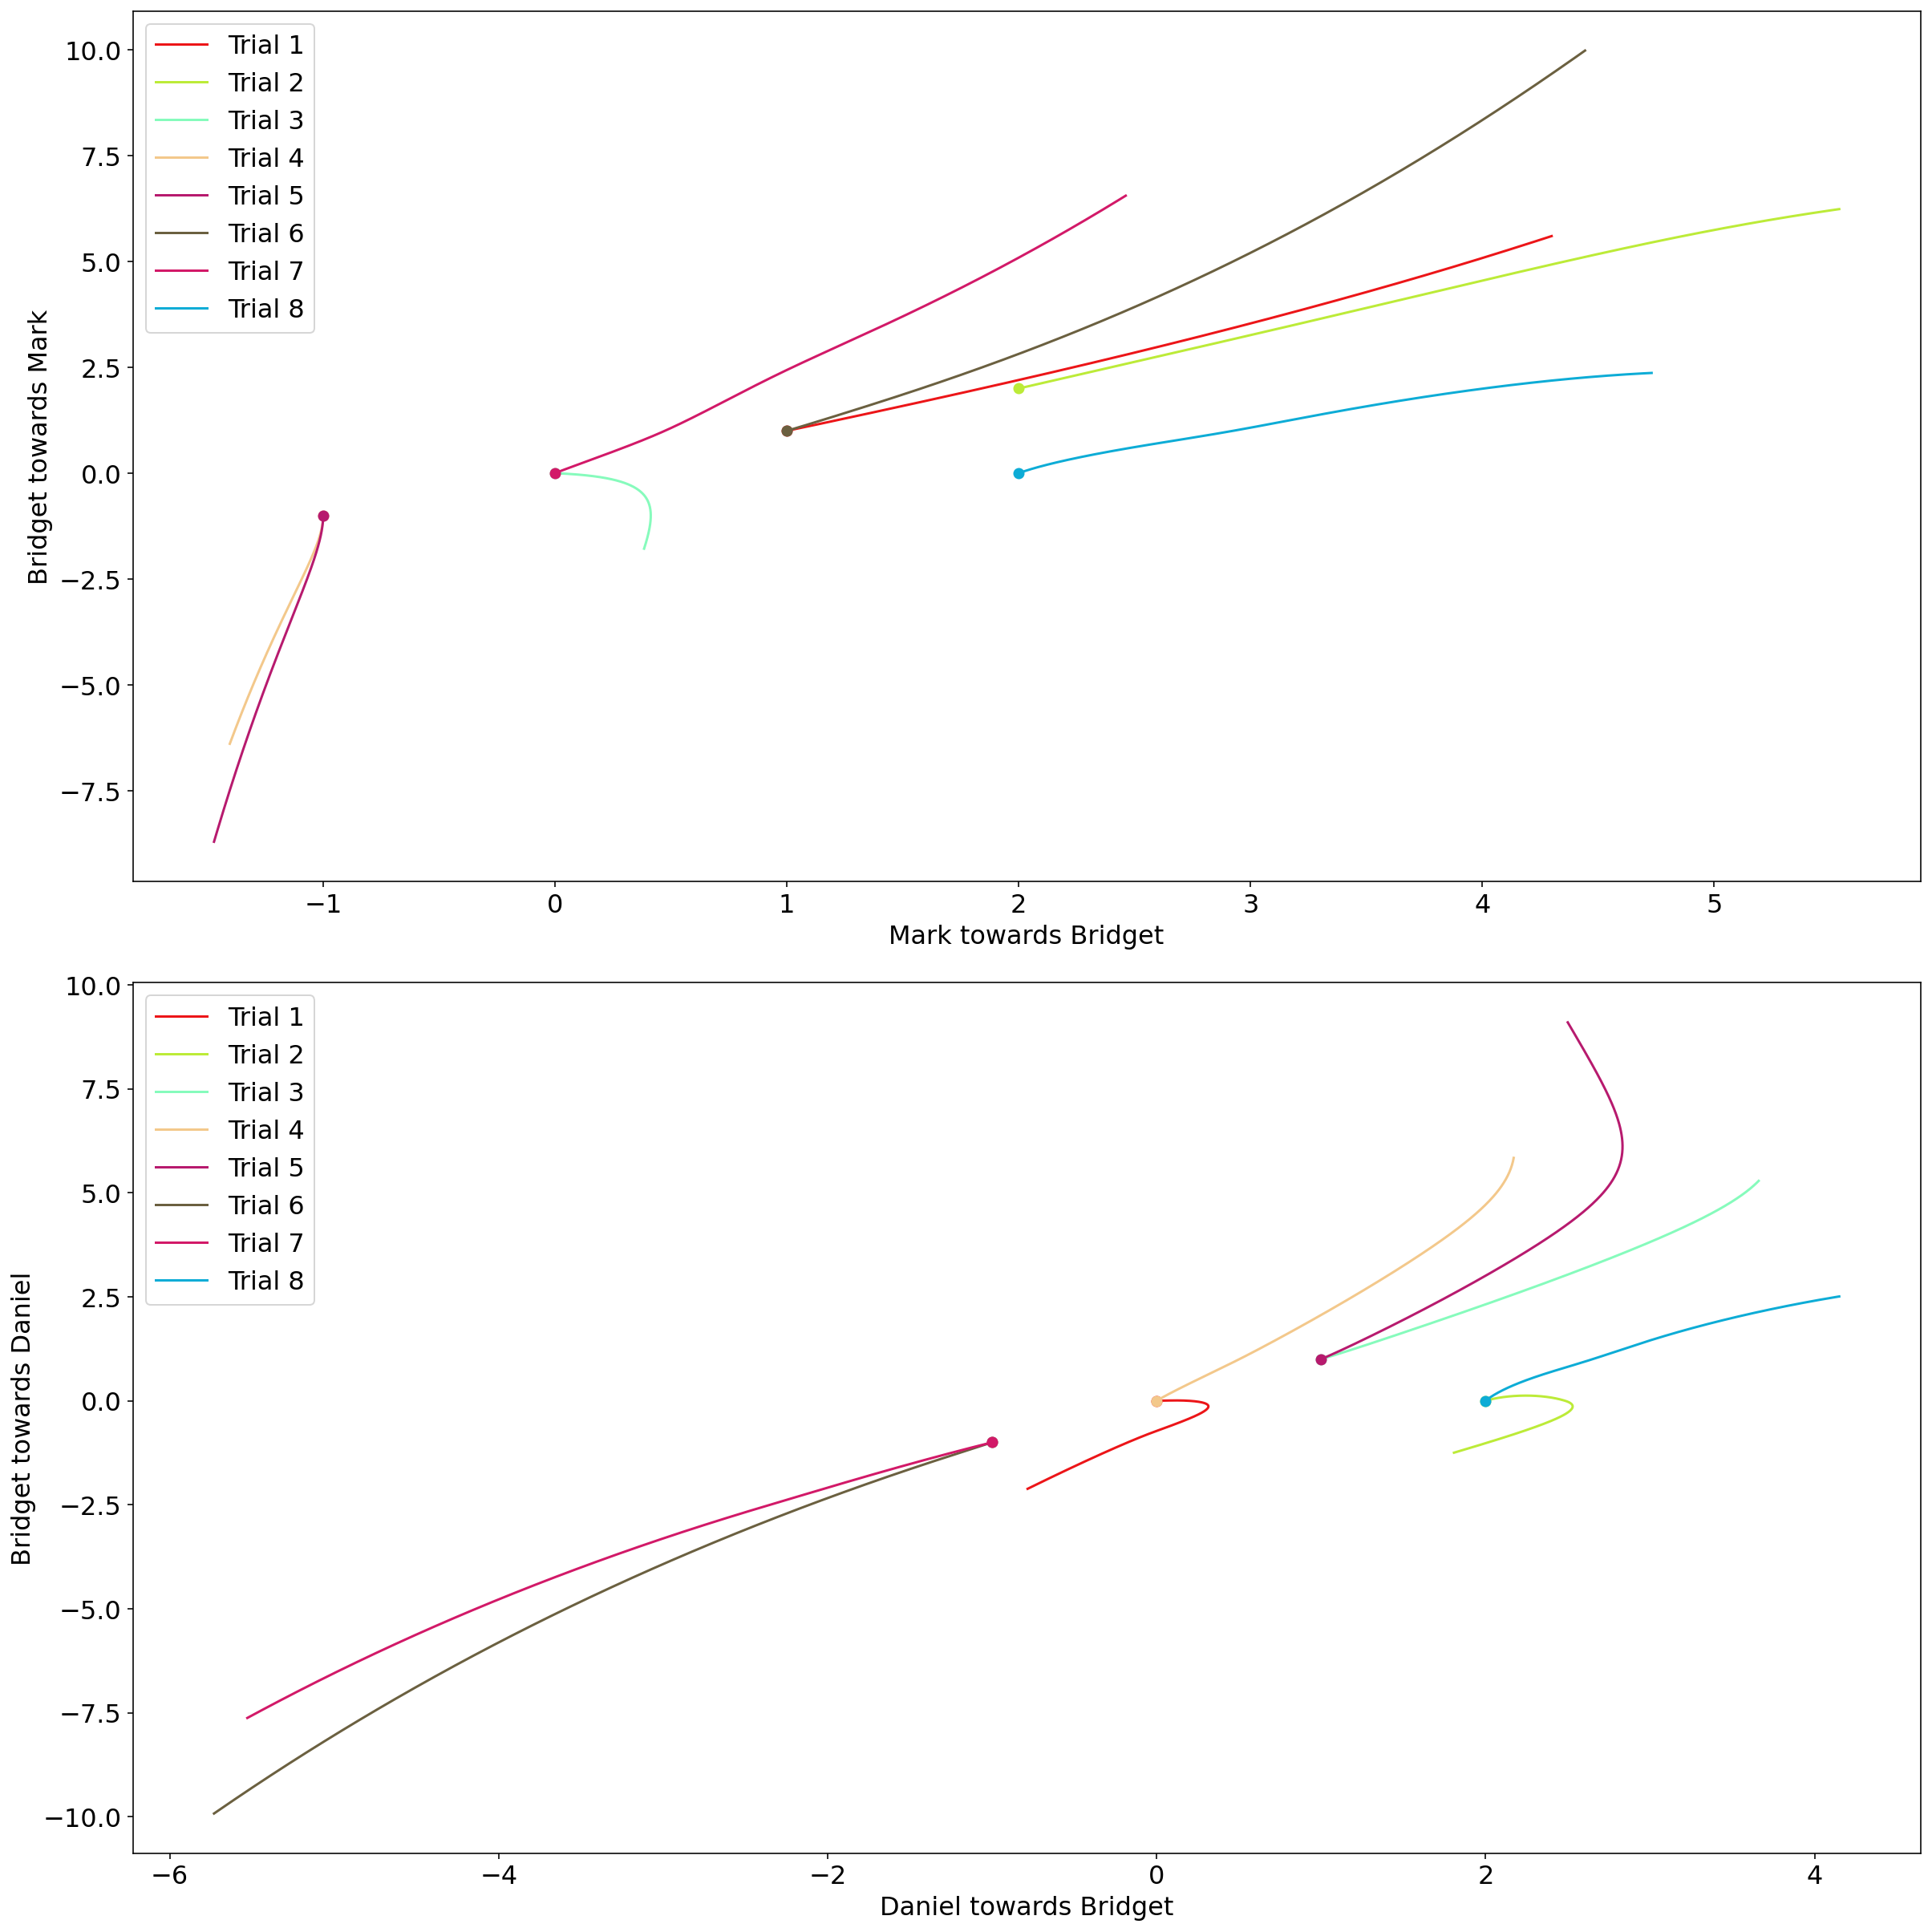

In [7]:
fig, axs = plt.subplots(2, 1)
axs[0].set_xlabel('Mark towards Bridget')
axs[0].set_ylabel('Bridget towards Mark')
axs[1].set_xlabel('Daniel towards Bridget')
axs[1].set_ylabel('Bridget towards Daniel')

for i, initial_values in enumerate(trials):
    mb_array, bm_array, bd_array, db_array = calculateOverTime(*initial_values)
    
    color = np.random.rand(3,)
    axs[0].plot(mb_array[0], bm_array[0], 'o', c = color)
    axs[0].plot(mb_array, bm_array, c = color, label = f"Trial {i + 1}")
    axs[0].legend()
    
    axs[1].plot(db_array[0], bd_array[0], 'o', c = color)
    axs[1].plot(db_array, bd_array, c = color, label = f"Trial {i + 1}")
    axs[1].legend()
    
plt.tight_layout()       
plt.show()

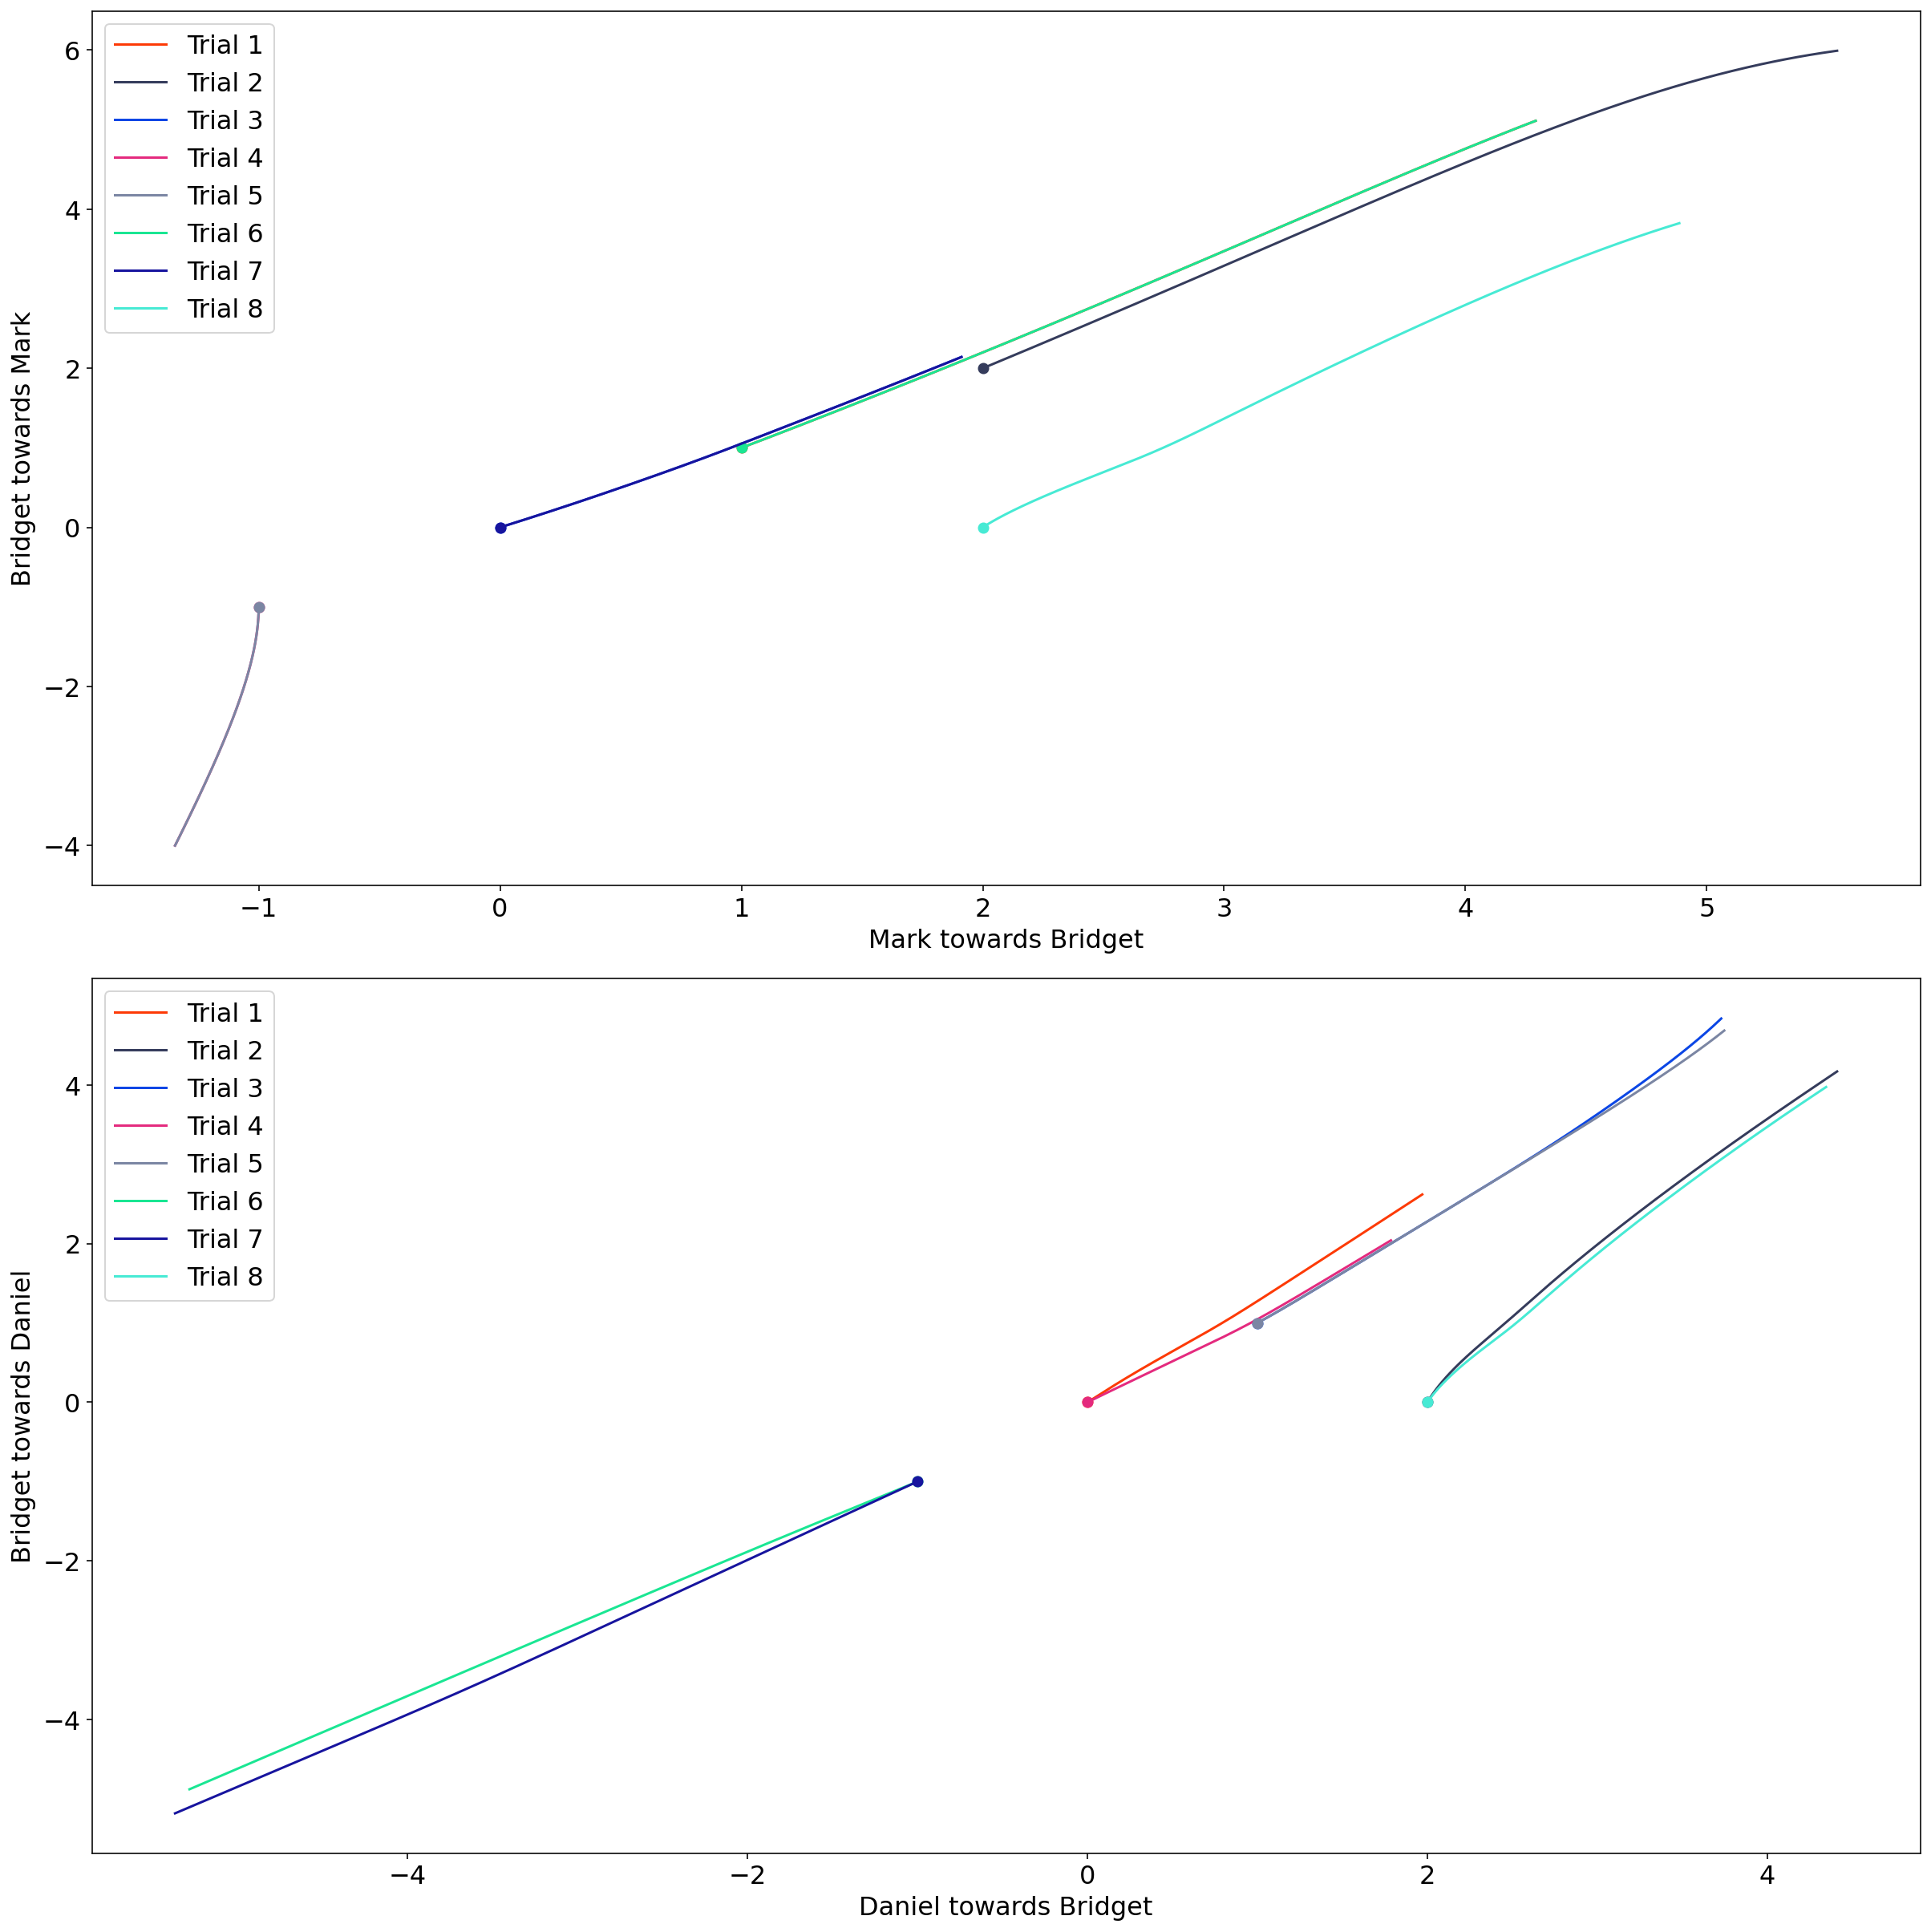

In [8]:
trial1 = [timePeriod, 1, 1, 0, 0, 0, 1, 0.9, 0.9, 1]
trial2 = [timePeriod, 2, 2, 0, 2, 0, 1, 0.9, 0.9, 1]
trial3 = [timePeriod, 0, 0, 1, 1, 0, 1, 0.9, 0.9, 1]
trial4 = [timePeriod, -1, -1, 0, 0, 0, 1, 0.9, 0.9, 1]
trial5 = [timePeriod, -1, -1, 1, 1, 0, 1, 0.9, 0.9, 1]
trial6 = [timePeriod, 1, 1, -1, -1, 0, 1, 0.9, 0.9, 1]
trial7 = [timePeriod, 0, 0, -1, -1, 0, 1, 0.9, 0.9, 1]
trial8 = [timePeriod, 2, 0, 0, 2, 0, 1, 0.9, 0.9, 1]

trials = [trial1, trial2, trial3, trial4, trial5, trial6, trial7, trial8]
fig, axs = plt.subplots(2, 1)
axs[0].set_xlabel('Mark towards Bridget')
axs[0].set_ylabel('Bridget towards Mark')
axs[1].set_xlabel('Daniel towards Bridget')
axs[1].set_ylabel('Bridget towards Daniel')

for i, initial_values in enumerate(trials):
    mb_array, bm_array, bd_array, db_array = calculateOverTime(*initial_values)
    
    color = np.random.rand(3,)
    axs[0].plot(mb_array[0], bm_array[0], 'o', c = color)
    axs[0].plot(mb_array, bm_array, c = color, label = f"Trial {i + 1}")
    axs[0].legend()
    
    axs[1].plot(db_array[0], bd_array[0], 'o', c = color)
    axs[1].plot(db_array, bd_array, c = color, label = f"Trial {i + 1}")
    axs[1].legend()
    
plt.tight_layout()       
plt.show()


---

---

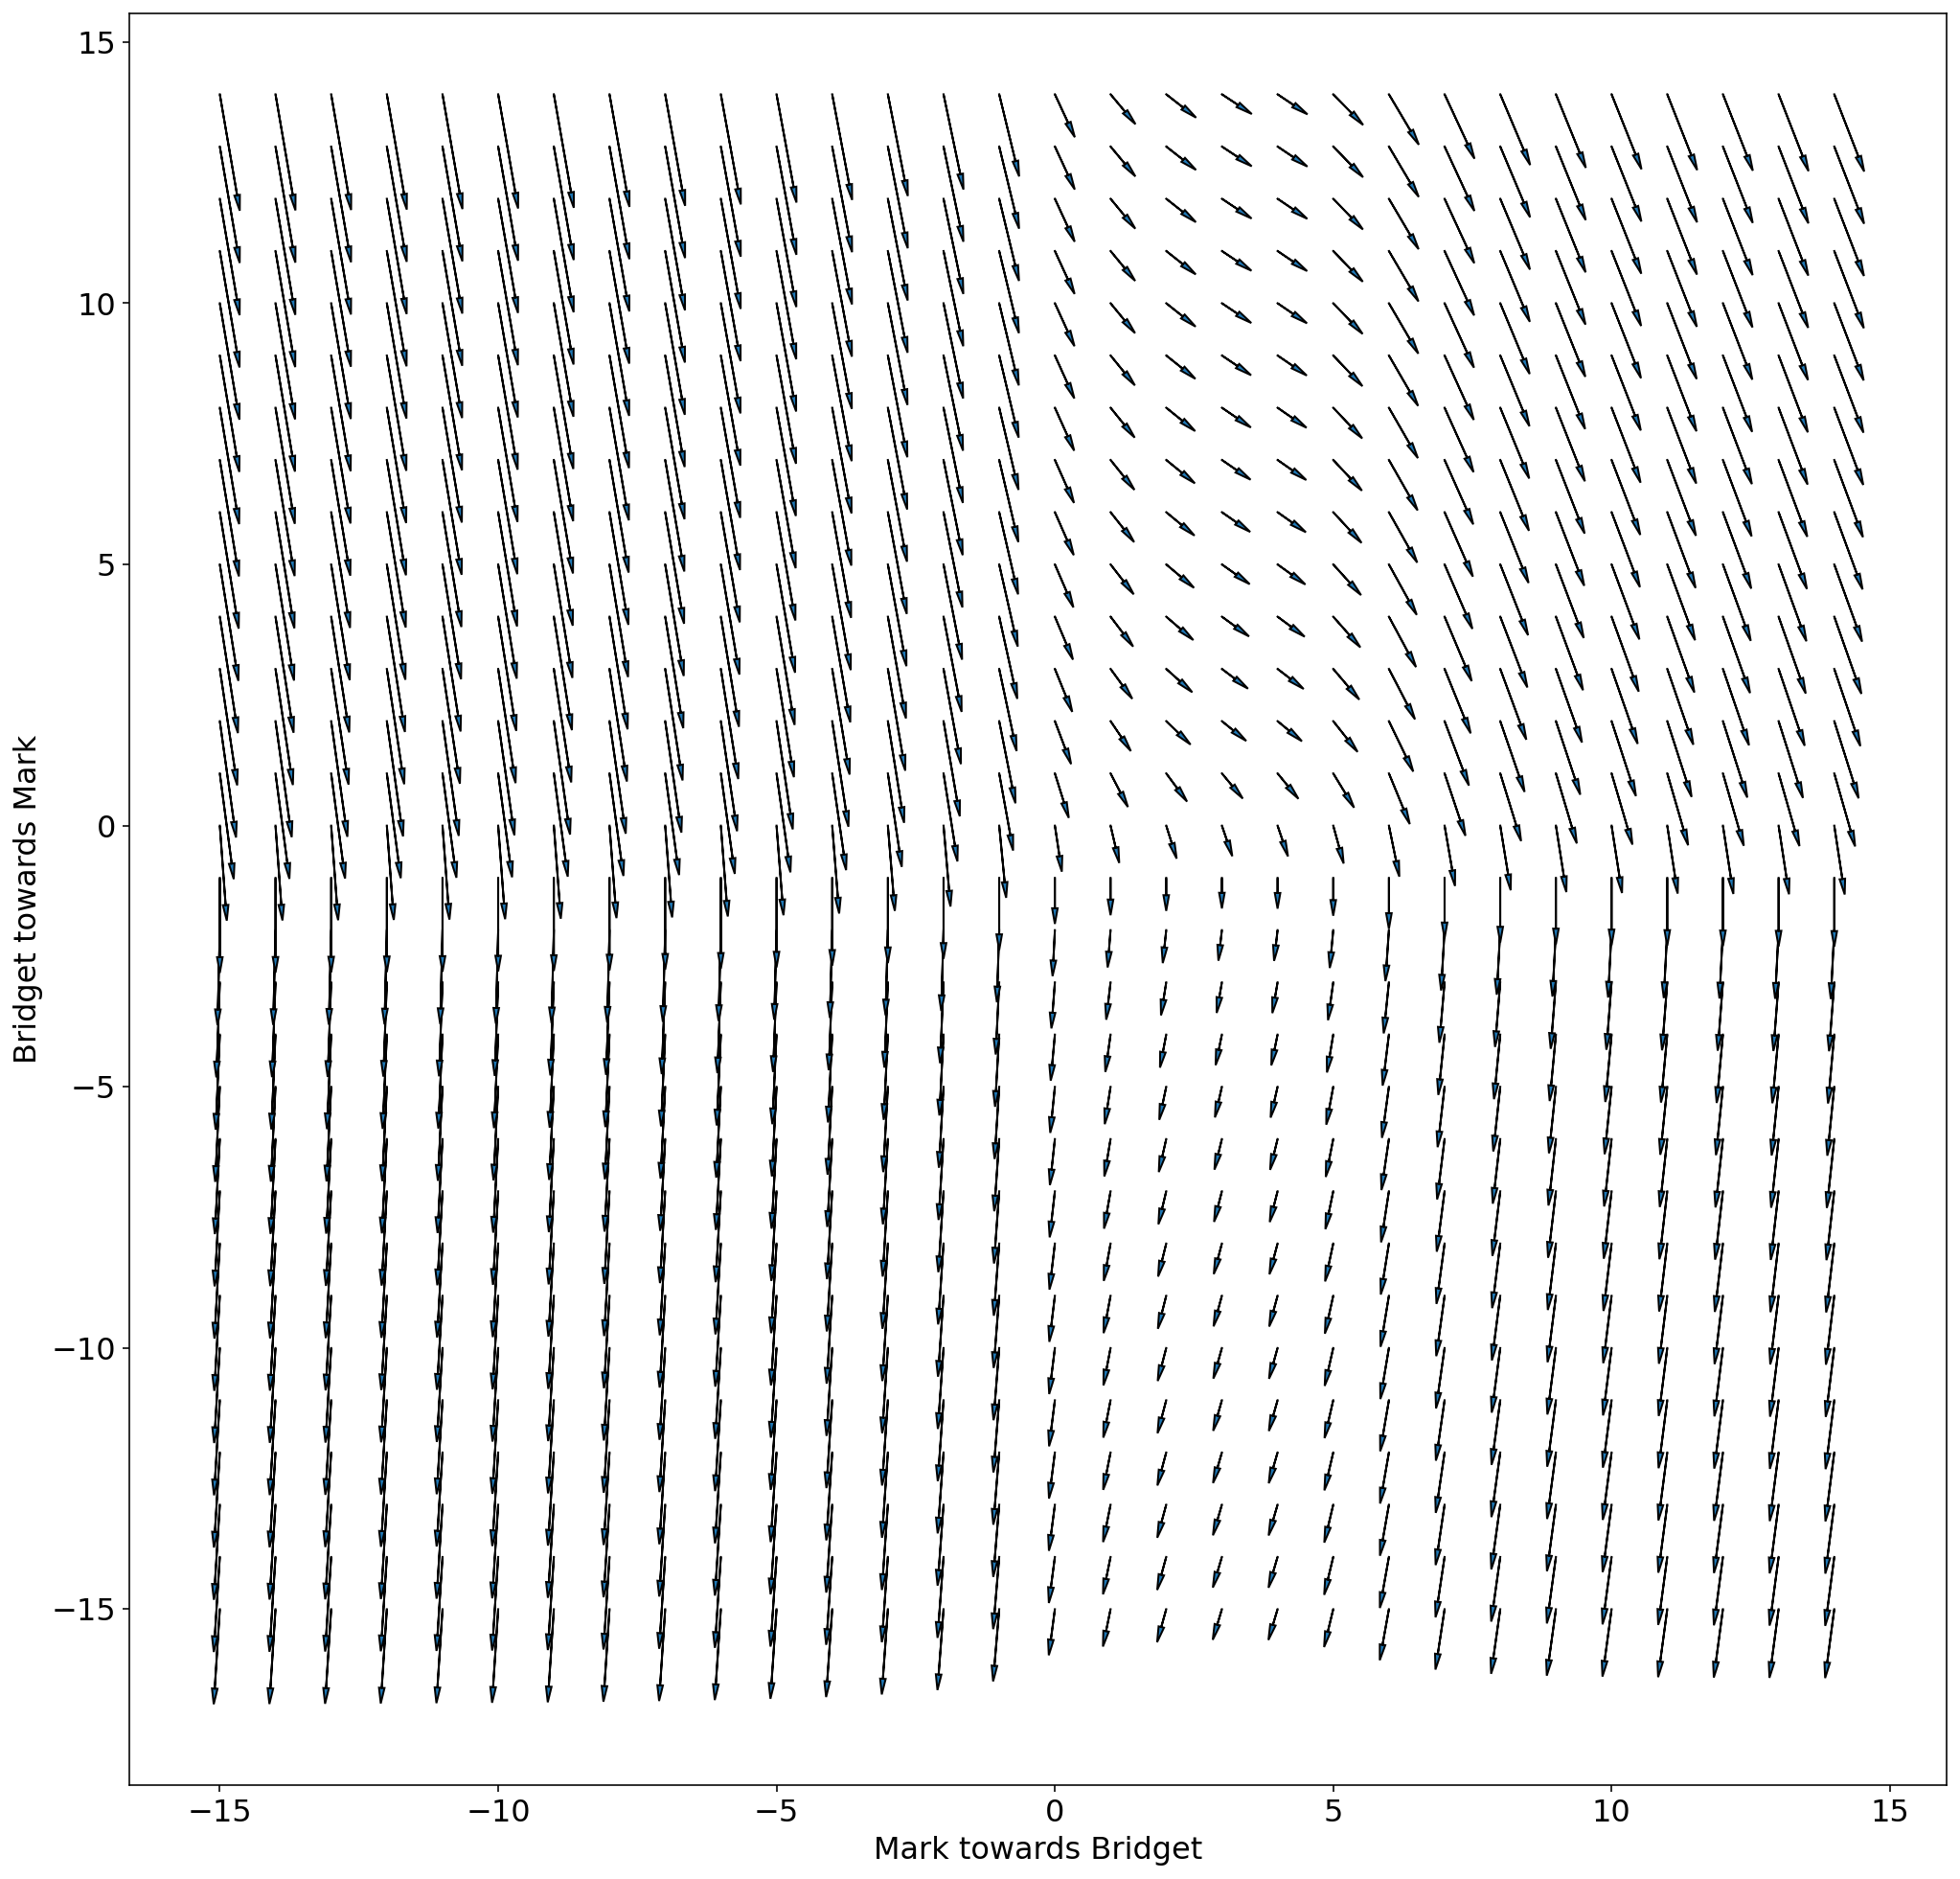

In [9]:
def plotFlowField(appeal_bm, appeal_m, beta, bd):
    ax = plt.subplot()
    ax.set_xlabel('Mark towards Bridget')
    ax.set_ylabel('Bridget towards Mark')

    mb_space = range(-15, 15, 1)
    bm_space = range(-15, 15, 1)

    for mb in mb_space:
        for bm in bm_space:
            ax.arrow(mb, bm, dmb_dt(mb, bm, appeal_bm) * 0.5, dbm_dt(bm, mb, appeal_m, beta, bd) * 0.5,
            length_includes_head = True, head_width = 0.1, head_length = 0.3)

    plt.show()
    
plotFlowField(1, 0.9, 0.5, 4)

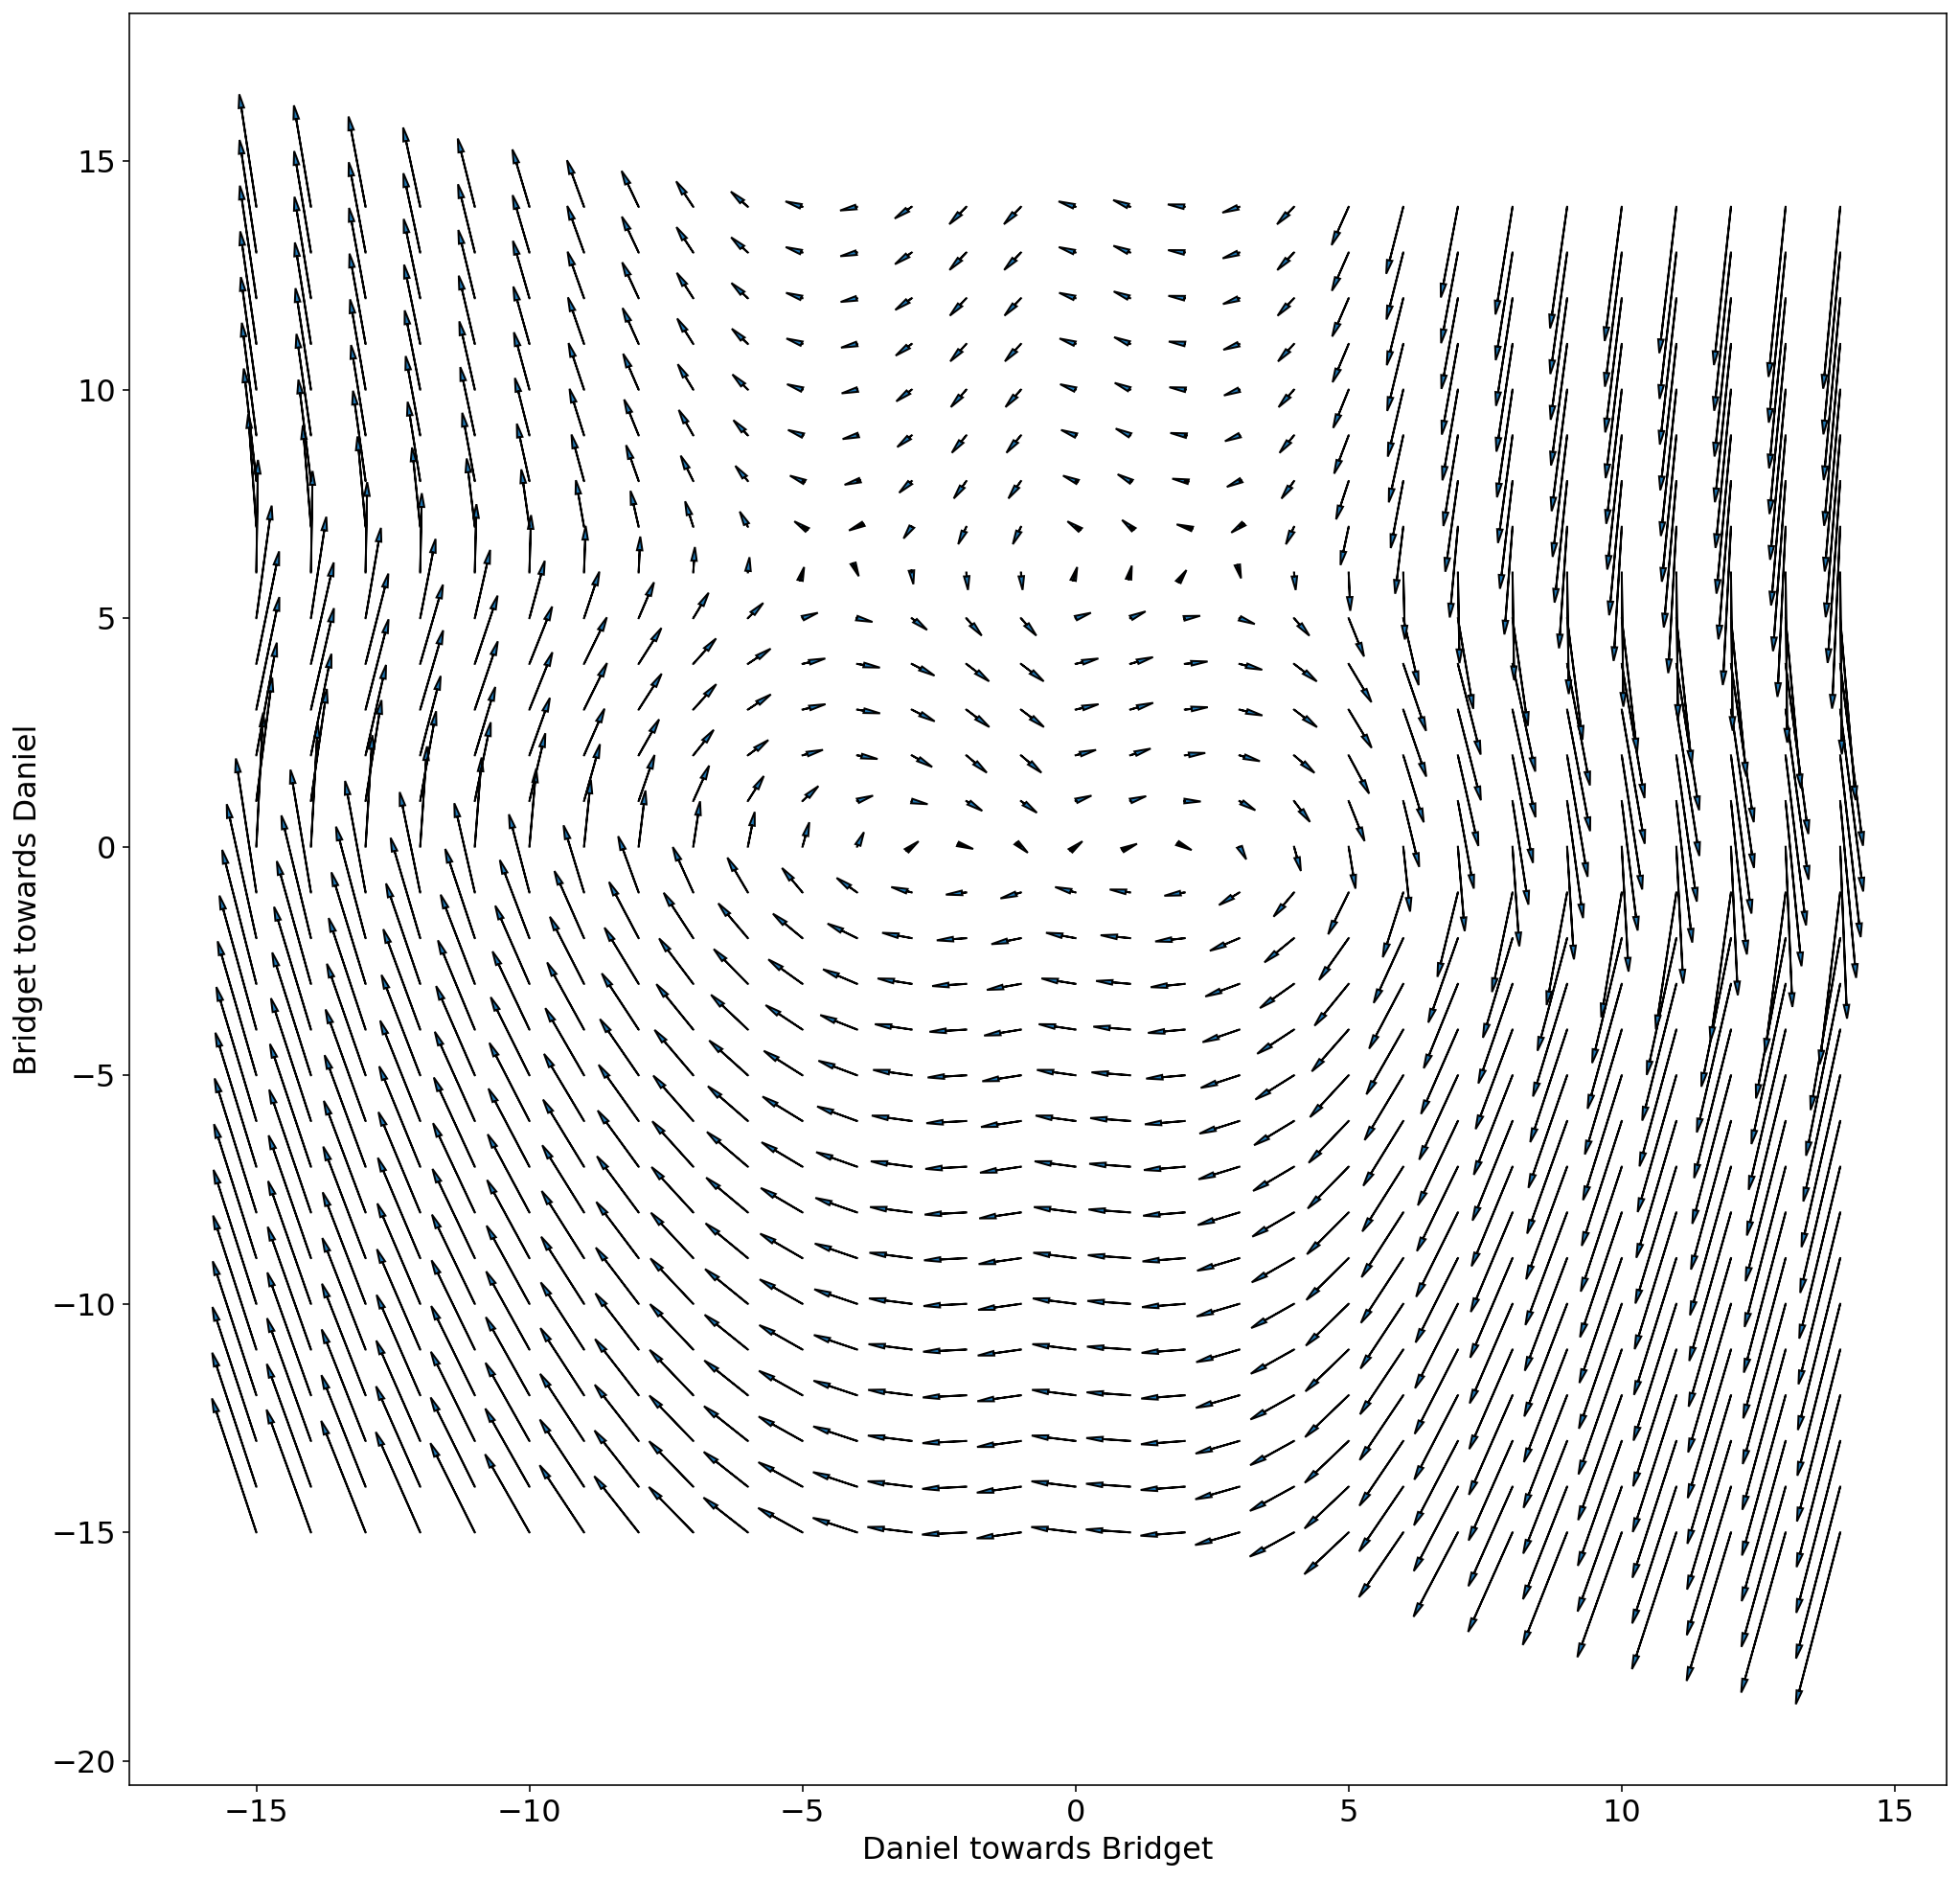

In [10]:
    
def plotFlowField(appeal_bd, appeal_d, beta, bd):
    ax = plt.subplot()
    ax.set_xlabel('Daniel towards Bridget')
    ax.set_ylabel('Bridget towards Daniel')

    db_space = range(-15, 15, 1)
    bd_space = range(-15, 15, 1)

    for db in db_space:
        for bd in bd_space:
            ax.arrow(db, bd, ddb_dt(db, bd, appeal_bd) * 0.5, dbd_dt(bd, db, appeal_d, beta, db) * 0.5,
                    length_includes_head = True, head_width = 0.1, head_length = 0.3)

    plt.show()
    
plotFlowField(1, 0.9, 0.5, 4)


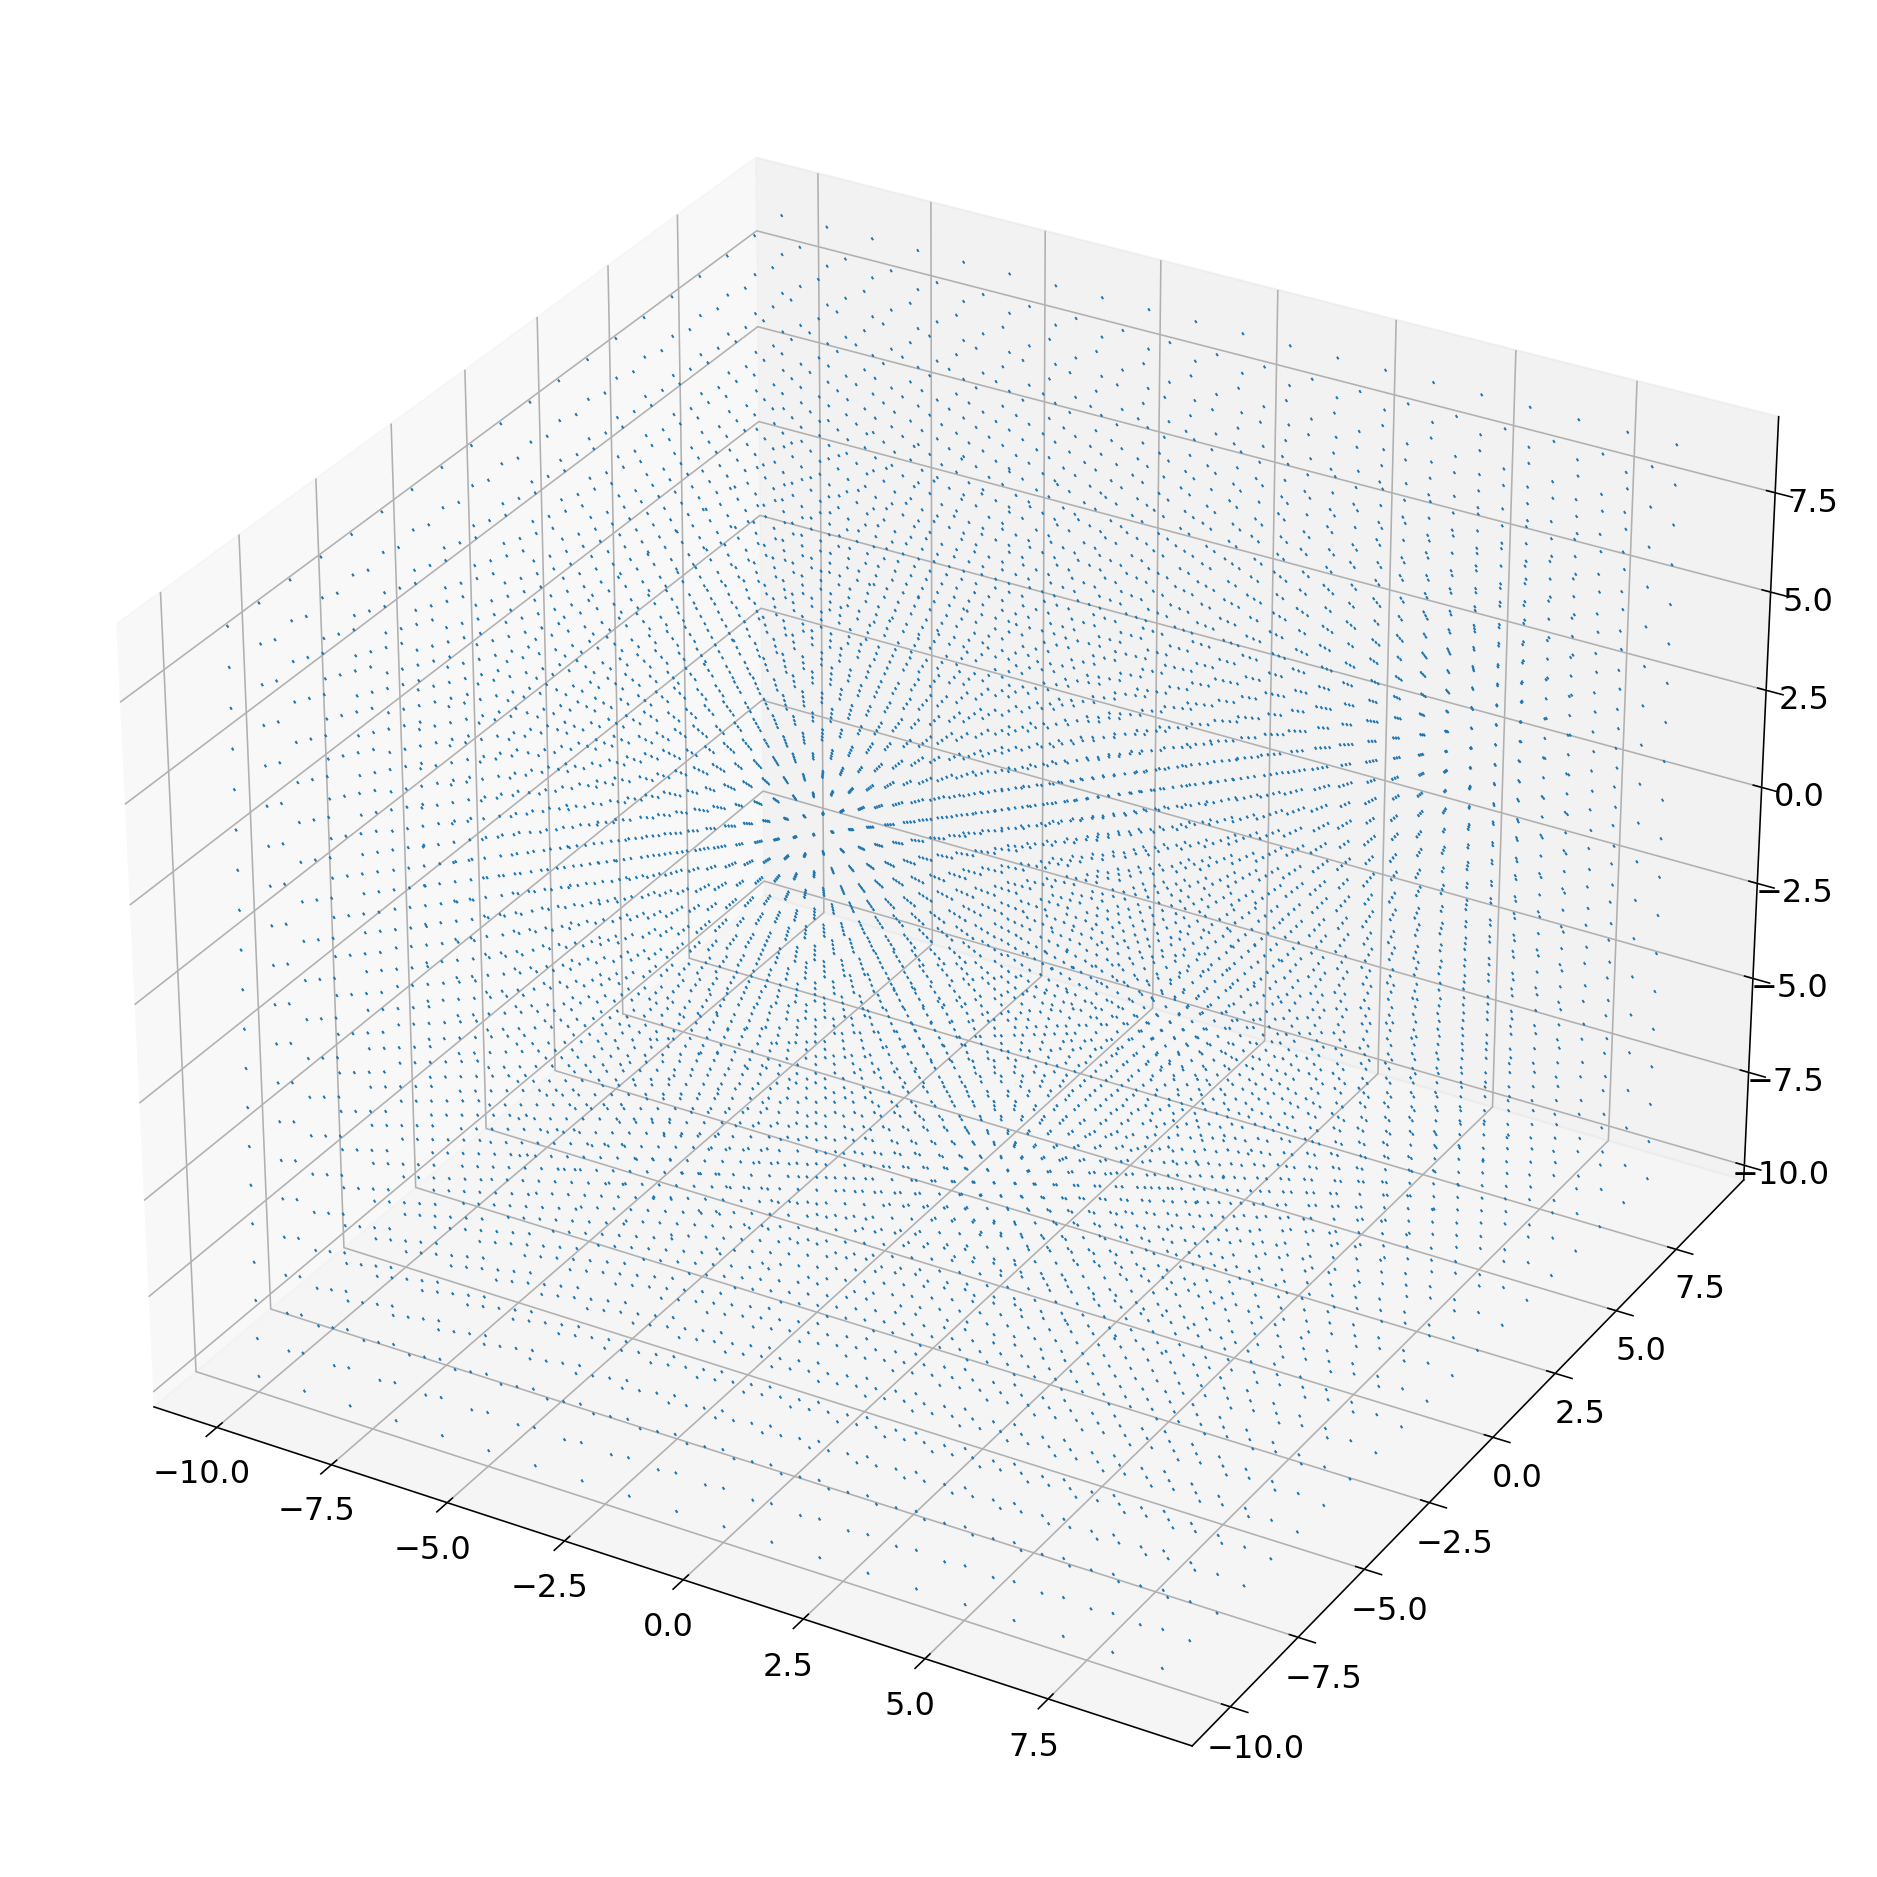

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-10, 10, 1),
                      np.arange(-10, 10, 1),
                      np.arange(-10, 10, 1))

db_space = range(-10, 10, 1)
bd_space = range(-10, 10, 1)
bm_space = range(-10, 10, 1)
mb_space = range(-10, 10, 1)
for db in db_space:
    for bd in bd_space:
        for bm in bm_space:
            for mb in mb_space:
                beta = 0.2
                mb = dmb_dt(mb, bm, 1.2) * 0.5
                bm = dbm_dt(bm, mb, 1, beta, bd) * 0.5
                bd = dbd_dt(bd, db, 1, beta, db) * 0.5
                db = dbd_dt(bd, db, 1.2, beta, db) * 0.5

ax.quiver(x, y, z, bm, mb, bd, length=0.1)

plt.show()

---

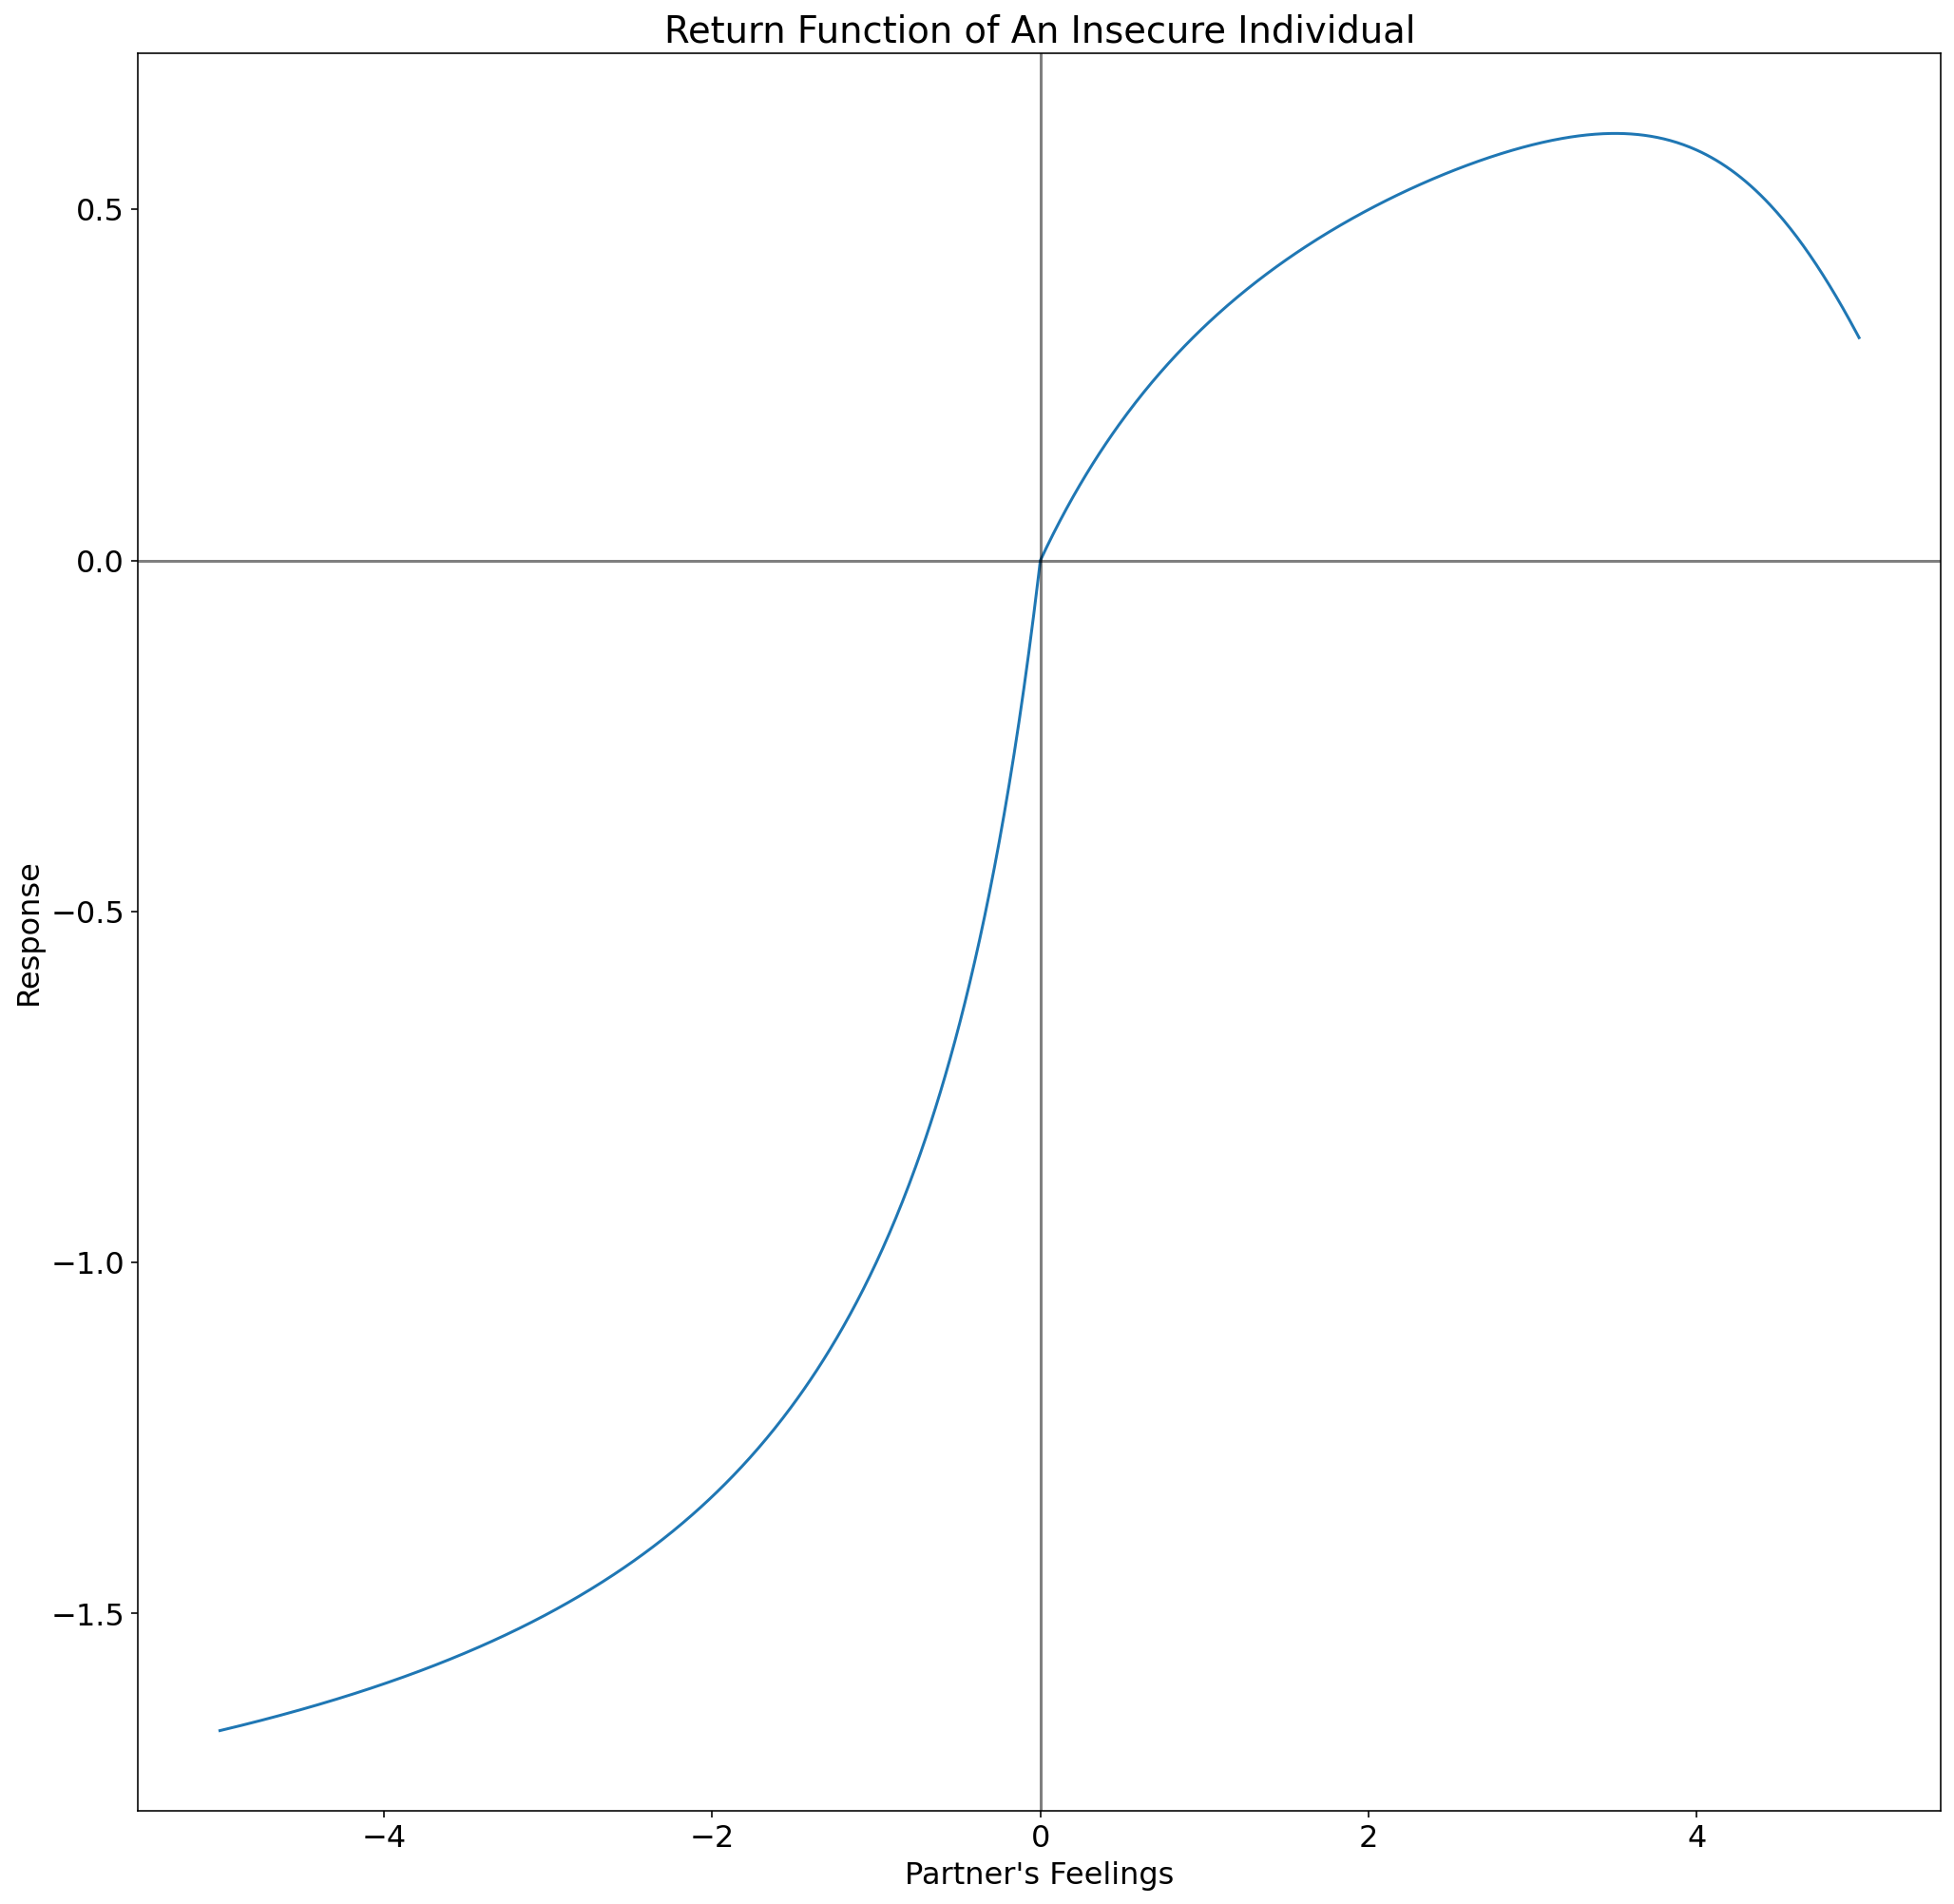

In [12]:
x = np.arange(-5, 5, 0.01)
y = list(map(f1_return, x))

ax = plt.subplot()

ax.plot(x, y)
ax.set_xlabel("Partner's Feelings")
ax.set_ylabel("Response")
ax.set_title("Return Function of An Insecure Individual")
ax.axvline(x=0, c="black", label="x=0",alpha=0.5)
ax.axhline(y=0, c="black", label="y=0",alpha=0.5)
plt.show()

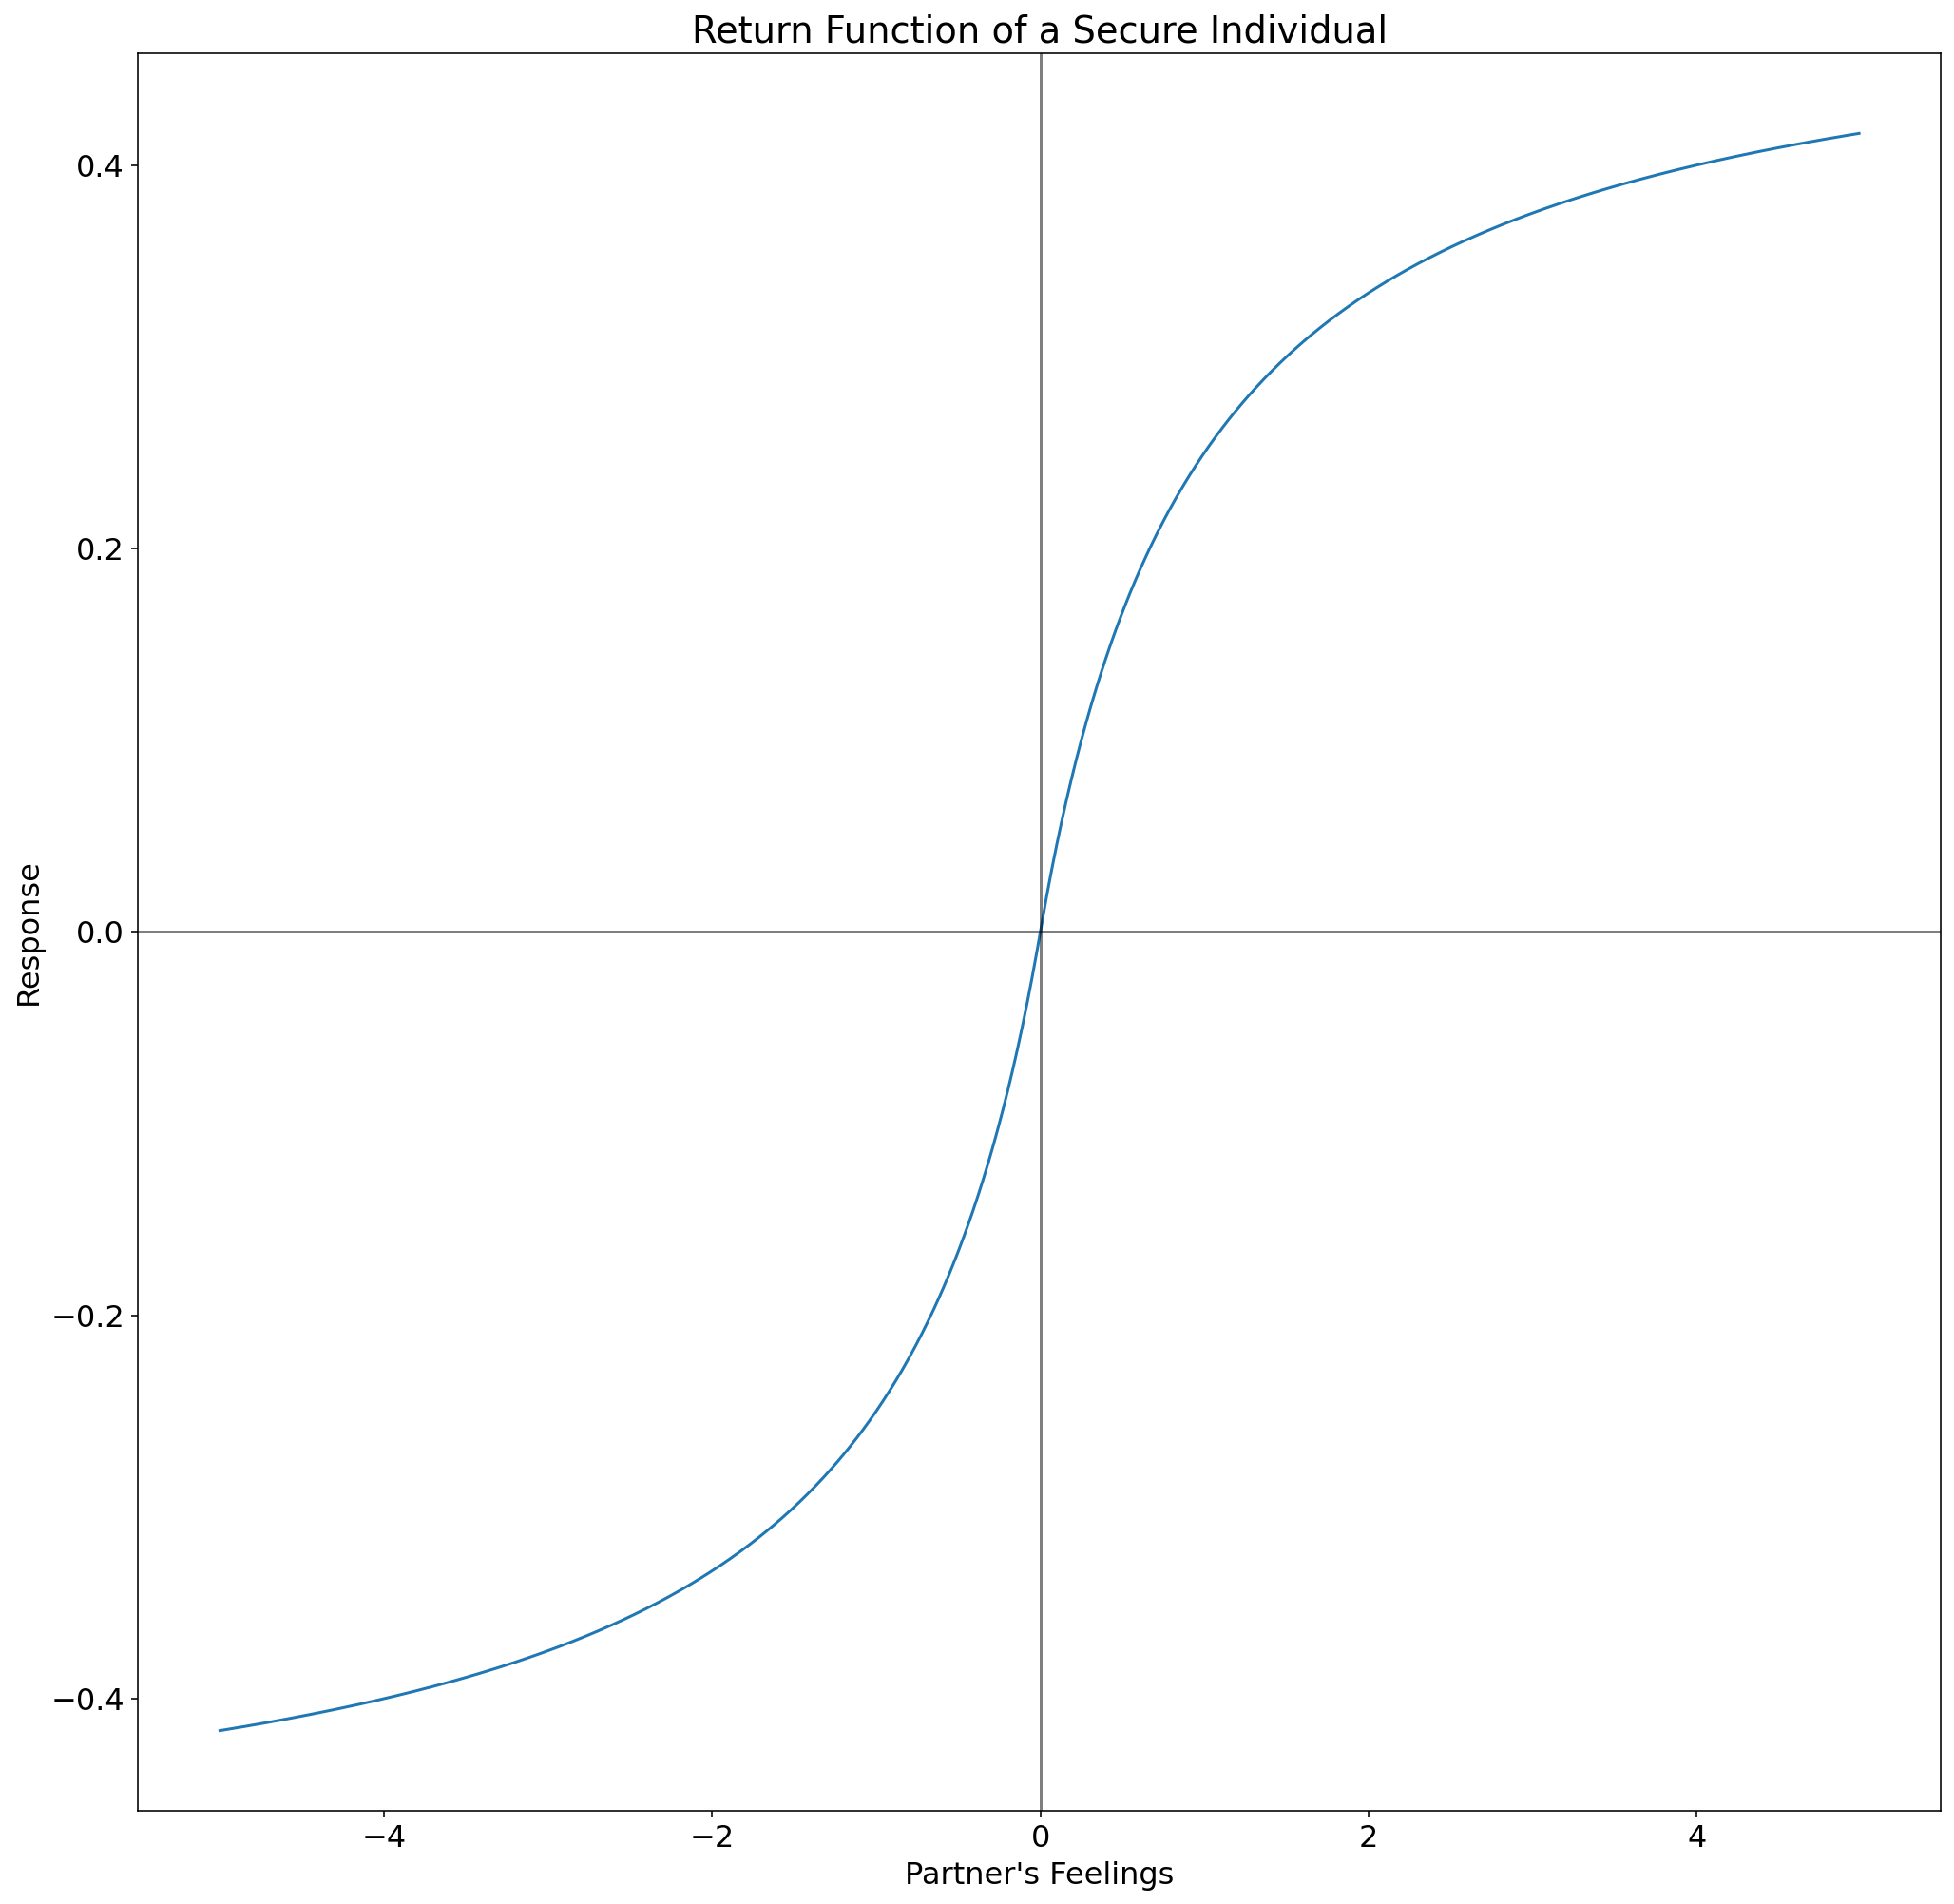

In [13]:


x = np.arange(-5, 5, 0.01)
y = list(map(f2_return, x))

ax = plt.subplot()

ax.plot(x, y)
ax.set_xlabel("Partner's Feelings")
ax.set_ylabel("Response")
ax.set_title("Return Function of a Secure Individual")
ax.axvline(x=0, c="black", label="x=0",alpha=0.5)
ax.axhline(y=0, c="black", label="y=0",alpha=0.5)
plt.show()

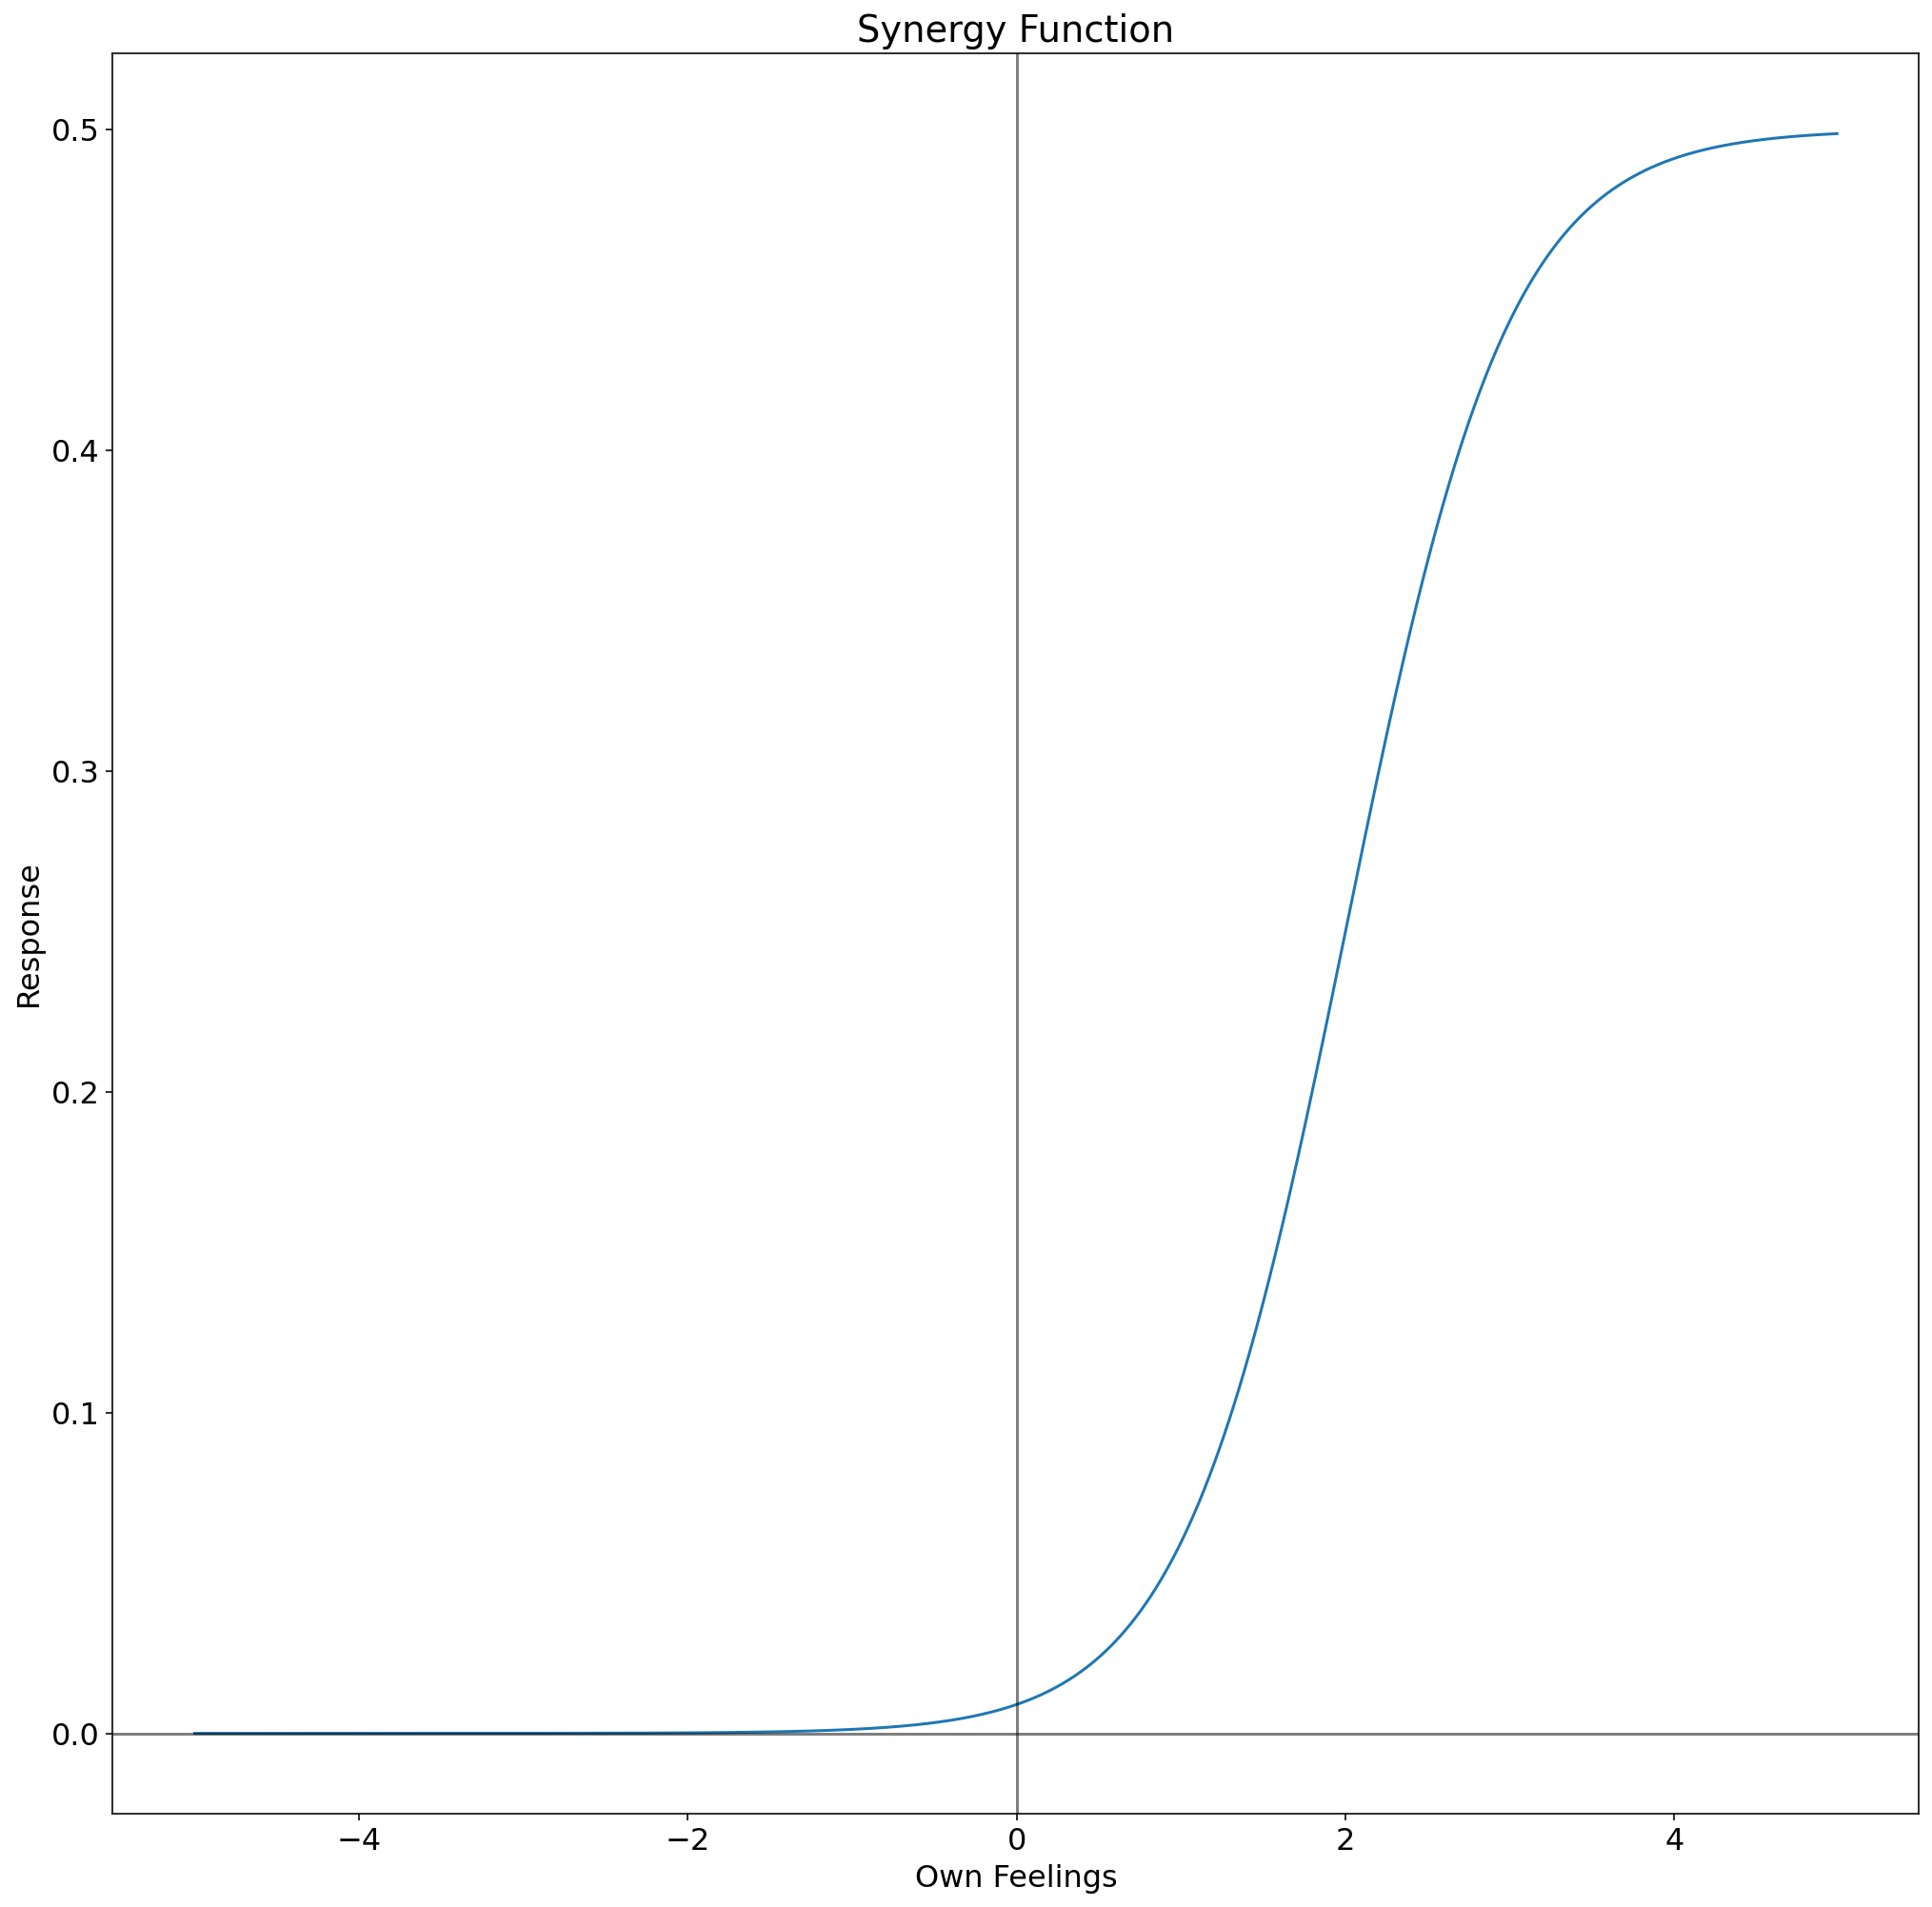

In [14]:
x = np.arange(-5, 5, 0.01)
y = list(map(appeal, x))

ax = plt.subplot()

ax.plot(x, y)
ax.set_xlabel("Own Feelings")
ax.set_ylabel("Response")
ax.set_title("Synergy Function")
ax.axvline(x=0, c="black", label="x=0",alpha=0.5)
ax.axhline(y=0, c="black", label="y=0",alpha=0.5)
plt.show()

---

In [15]:
import numpy as np
from love_triangle import *

def calculateOverTime(timePeriod, initial_mb, initial_bm, initial_bd, initial_db,
                      beta, appeal_bm, appeal_bd, appeal_m, appeal_d):
    
    def updateFeelingsDynamicAppeal(mb, bm, db, bd, t):
        
        # Step size
        dt = 0.1
        
        # Change in Mark towards Bridget
        dmb_dt_val = dmb_dt2(mb, bm, appeal_bm, t/10) * dt

        # Change in Bridget towards Mark & Daniel
        dbm_dt_val = dbm_dt(bm, mb, appeal_m, beta, bd) * dt
        dbd_dt_val = dbd_dt(bd, db, appeal_d, beta, bm) * dt

        # Change in Daniel towards Bridget
        ddb_dt_val = ddb_dt(db, bd, appeal_bd) * dt

        # Update Mark towards Bridget
        mb = mb + dmb_dt_val
        # Update Bridget towards Mark & Daniel
        bm = bm + dbm_dt_val
        bd = bd + dbd_dt_val
        # Update Daniel towards Bridget
        db = db + ddb_dt_val

        return (mb, bm, bd, db)

    # Initialize arrays
    mb_array = np.array([initial_mb])
    bm_array = np.array([initial_bm])
    bd_array = np.array([initial_bd])
    db_array = np.array([initial_db])
    
    # Initialize mb, bm, bd, db
    mb = initial_mb
    bm = initial_bm
    bd = initial_bd
    db = initial_db
    
    for t in range(timePeriod):
        mb, bm, bd, db = updateFeelingsDynamicAppeal(mb, bm, db, bd, t)
        mb_array = np.append(mb_array, mb)
        bm_array = np.append(bm_array, bm)
        bd_array = np.append(bd_array, bd)
        db_array = np.append(db_array, db)
        
    return (mb_array, bm_array, bd_array, db_array)

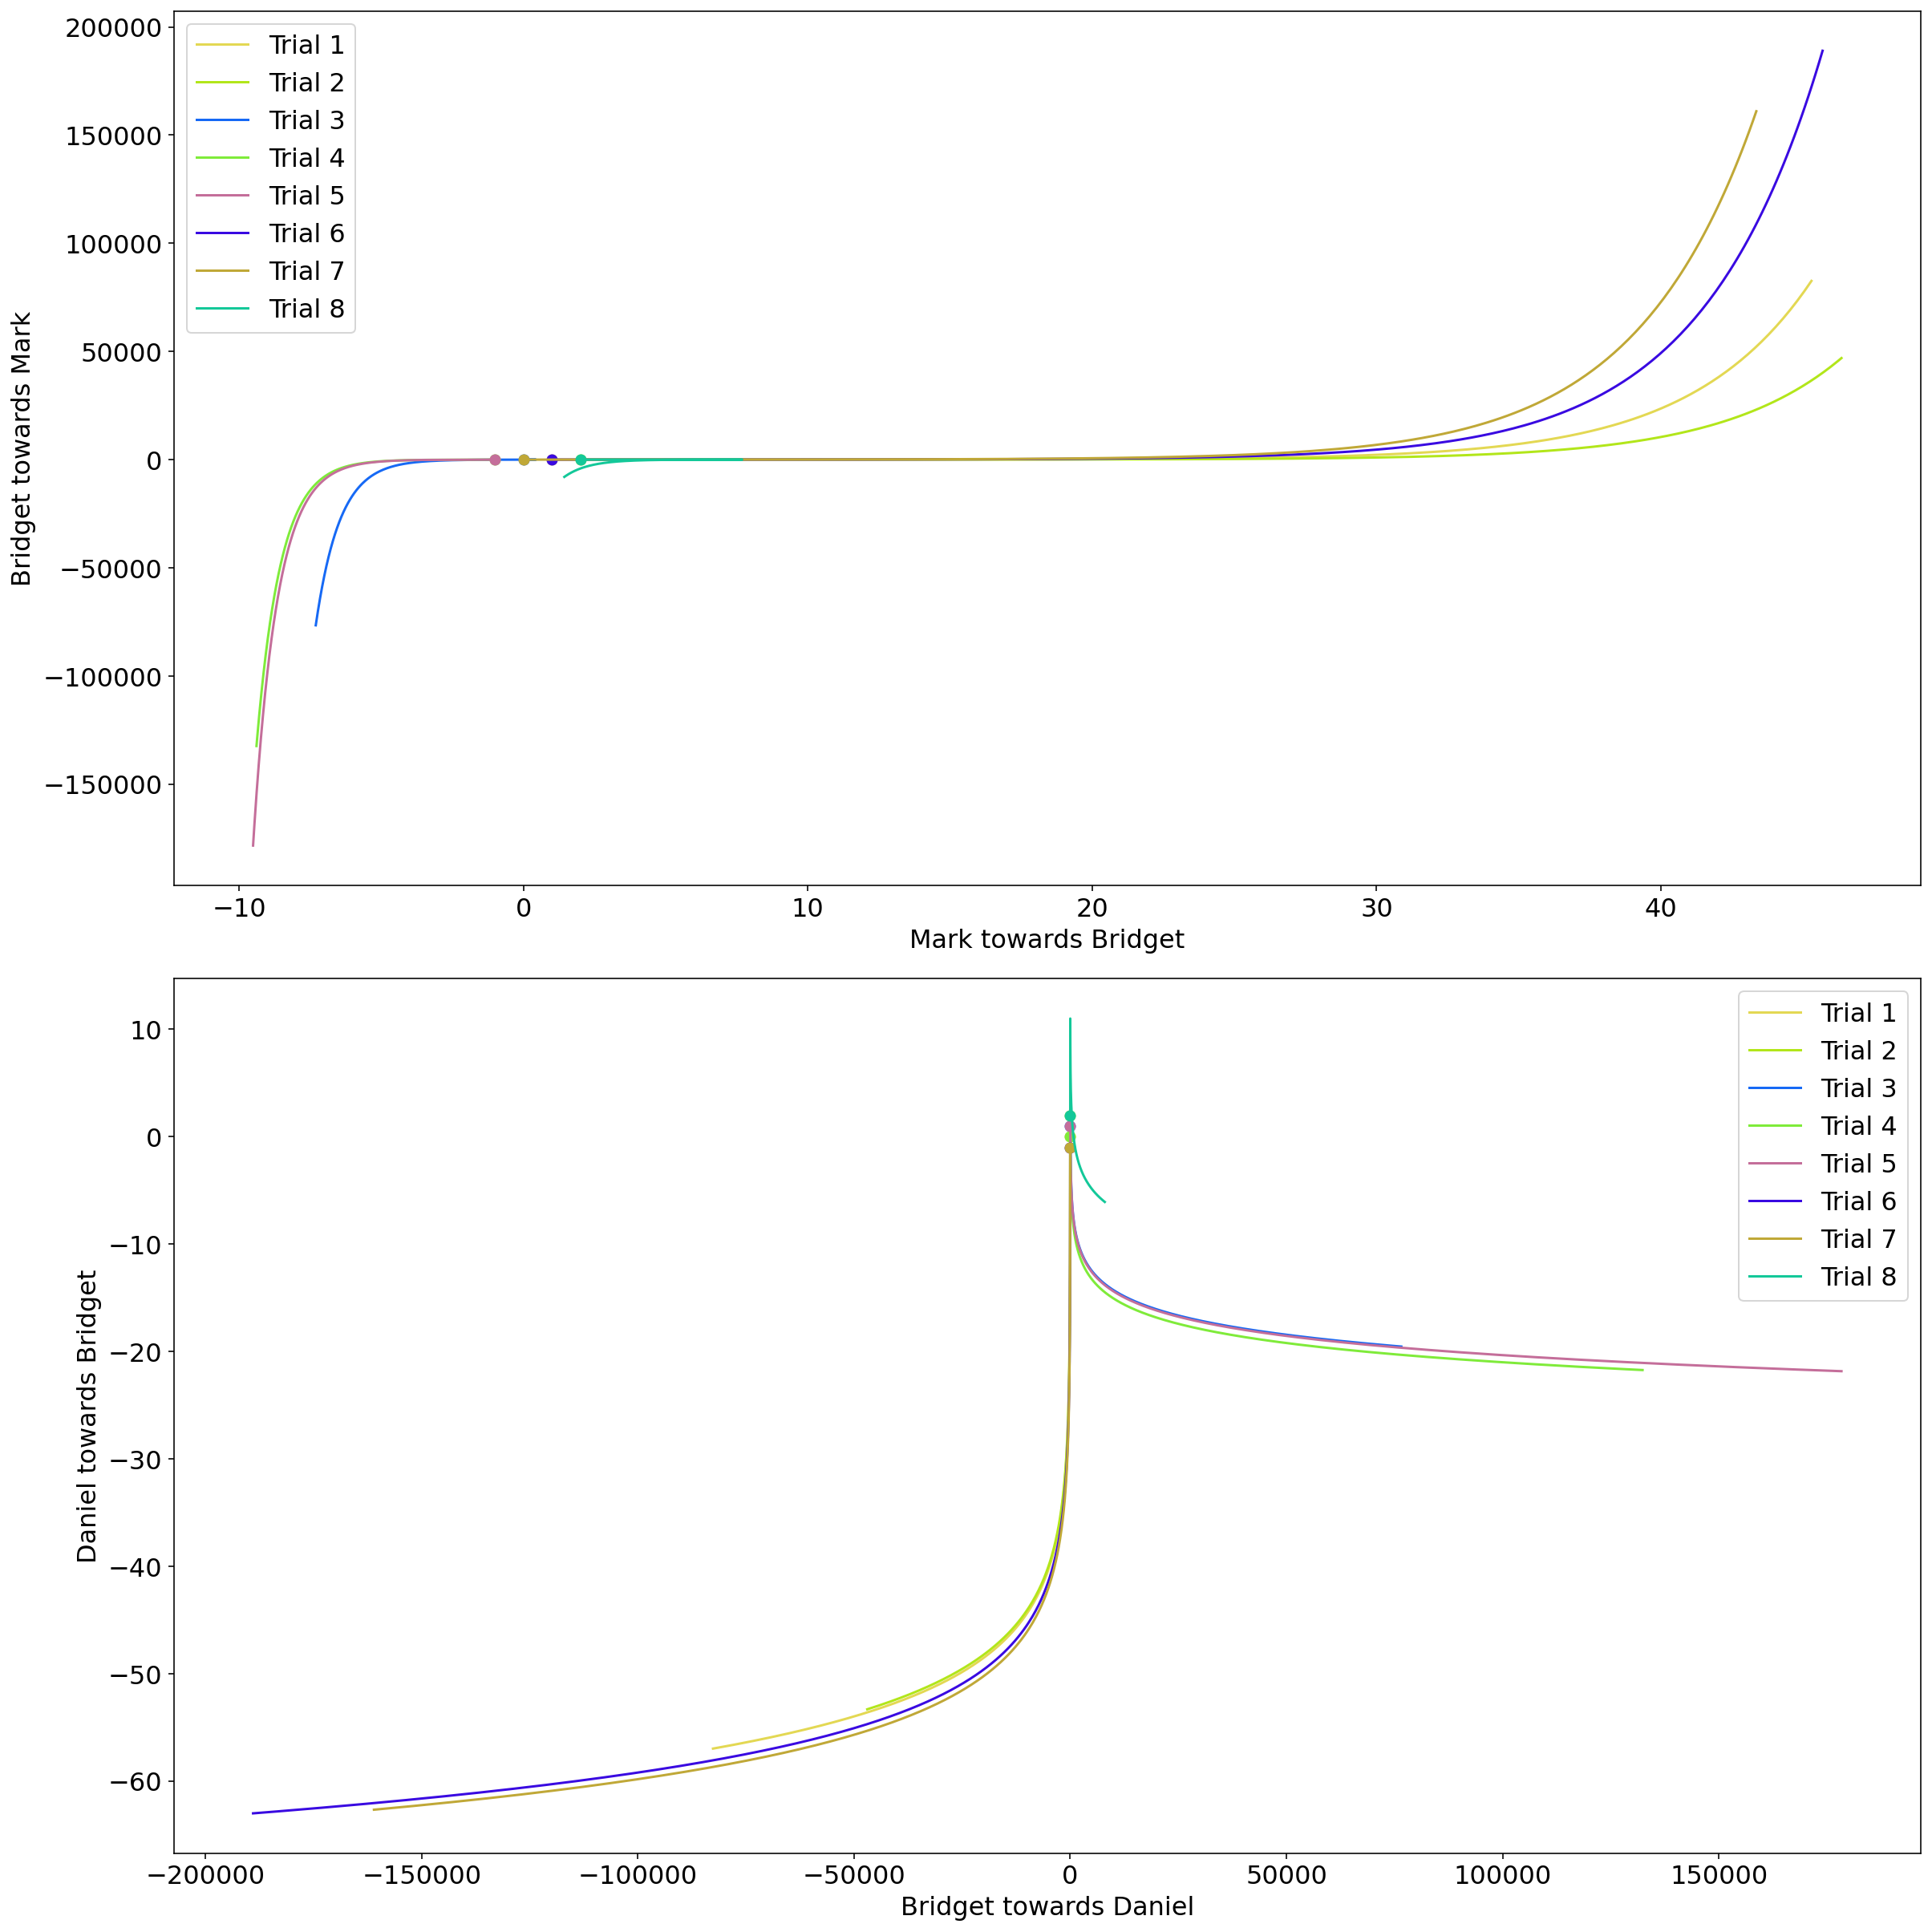

In [16]:
trial1 = [timePeriod, 1, 1, 0, 0, 0.3, 1, 0.9, 0.9, 1]
trial2 = [timePeriod, 2, 2, 0, 2, 0.3, 1, 0.9, 0.9, 1]
trial3 = [timePeriod, 0, 0, 1, 1, 0.3, 1, 0.9, 0.9, 1]
trial4 = [timePeriod, -1, -1, 0, 0, 0.3, 1, 0.9, 0.9, 1]
trial5 = [timePeriod, -1, -1, 1, 1, 0.3, 1, 0.9, 0.9, 1]
trial6 = [timePeriod, 1, 1, -1, -1, 0.3, 1, 0.9, 0.9, 1]
trial7 = [timePeriod, 0, 0, -1, -1, 0.3, 1, 0.9, 0.9, 1]
trial8 = [timePeriod, 2, 0, 0, 2, 0.3, 1, 0.9, 0.9, 1]

trials = [trial1, trial2, trial3, trial4, trial5, trial6, trial7, trial8]

fig, axs = plt.subplots(2, 1)
axs[0].set_xlabel('Mark towards Bridget')
axs[0].set_ylabel('Bridget towards Mark')
axs[1].set_xlabel('Bridget towards Daniel')
axs[1].set_ylabel('Daniel towards Bridget')

for i, initial_values in enumerate(trials):
    mb_array, bm_array, bd_array, db_array = calculateOverTime(*initial_values)
    
    color = np.random.rand(3,)
    axs[0].plot(mb_array[0], bm_array[0], 'o', c = color)
    axs[0].plot(mb_array, bm_array, c = color, label = f"Trial {i + 1}")
    axs[0].legend()
    
    axs[1].plot(bd_array[0], db_array[0], 'o', c = color)
    axs[1].plot(bd_array, db_array, c = color, label = f"Trial {i + 1}")
    axs[1].legend()
    
plt.tight_layout()       
plt.show()